## Fifa player clustering

**Business case**

Football is one of the popular sports in the world. The aim of football is to score more goals than your opponent in a 90 minute playing time frame. Each team consists of 11 players. These are made up of one goalkeeper and ten outfield players. Players must use their feet to kick the ball and are prohibited to use their hands apart from goalkeepers who can use any part of their body within the 18 yard box. All of the 11 players should acquire a few essential skills to become a professional footballer. Those skills are dribbling, passing, shooting, defending the goal, to head the ball, juggle the ball, using both their feet efficiently etc., Also, knowing the opponent team players' skill is essential to play effective football to increase the winning rate of the games. 

FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series. EA sports data was fetched from SoFIFA, which is a database and forum. Every player in a FIFA Career Mode is included on SoFIFA’s database. It has provided data of different football players across like players' full name, age, height, weight, their position in the team, rating of their skills like dribble, goal keeping, passing, their mental strength, their ranking with respect to each player's playing position etc., using which we can cluster the players via various skills and attributes features.

Using this information cluster or group the players.

In [249]:
# importing all neccessary modules

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [250]:
# loading the data

fifa_data = pd.read_csv('players_20.csv', na_filter=['+#'])

In [251]:
pd.set_option('display.Max_column', None)
pd.set_option('display.max_rows', None)

In [252]:
# view sample data

fifa_data.sample(6)

sofifa_id                                         player_url  \
12883     144024  https://sofifa.com/player/144024/david-zibung/...   
17642     252501  https://sofifa.com/player/252501/michal-bogacz...   
13299     238038  https://sofifa.com/player/238038/jordy-wehrman...   
14568     209040  https://sofifa.com/player/209040/majed-hazazi/...   
6319      182864  https://sofifa.com/player/182864/diego-vera/20...   
11041     245639  https://sofifa.com/player/245639/andre-anderso...   

           short_name                    long_name  age         dob  \
12883       D. Zibung                 David Zibung   35  1984-01-10   
17642       M. Bogacz                Michał Bogacz   18  2001-03-13   
13299     J. Wehrmann               Jordy Wehrmann   20  1999-03-25   
14568       M. Hazazi                 Majed Hazazi   31  1988-03-19   
6319          D. Vera                   Diego Vera   34  1985-01-05   
11041  André Anderson  André Anderson Pomilio Lima   19  1999-09-23   

       height_cm  weight_kg   nationality            club  overall  potential  \
12883        187         85   Switzerland       FC Luzern       63         63   
17642        188         78        Poland  Zagłębie Lubin       53         70   
13299        176         71   Netherlands       Feyenoord       62         73   
14568        167         57  Saudi Arabia        Damac FC       61         61   
6319         184         72       Uruguay    Curicó Unido       69         69   
11041        180         78        Brazil           Lazio       64         81   

       value_eur  wage_eur player_positions preferred_foot  \
12883     100000      2000               GK          Right   
17642     110000      1000               LB           Left   
13299     525000      2000               CM          Right   
14568     180000      3000               RB          Right   
6319      550000      3000               ST          Right   
11041     975000      6000               CF          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
12883                         1          2            1  Medium/Medium   
17642                         1          2            2  Medium/Medium   
13299                         1          3            2    Medium/High   
14568                         1          2            2  Medium/Medium   
6319                          1          3            3  Medium/Medium   
11041                         1          3            3  Medium/Medium   

      body_type real_face  release_clause_eur player_tags team_position  \
12883    Stocky        No            145000.0         NaN           SUB   
17642    Normal        No            217000.0         NaN           SUB   
13299      Lean        No            893000.0         NaN           RES   
14568      Lean        No            297000.0         NaN            RB   
6319       Lean        No            743000.0         NaN            ST   
11041      Lean        No           2300000.0         NaN           SUB   

       team_jersey_number loaned_from      joined  contract_valid_until  \
12883                 1.0         NaN  2003-07-01                2020.0   
17642                14.0         NaN  2019-07-17                2023.0   
13299                26.0         NaN  2015-11-25                2020.0   
14568                88.0         NaN  2019-07-04                2023.0   
6319                  9.0         NaN  2019-07-23                2021.0   
11041                28.0         NaN  2018-07-01                2022.0   

      nation_position  nation_jersey_number  pace  shooting  passing  \
12883             NaN                   NaN   NaN       NaN      NaN   
17642             NaN                   NaN  67.0      27.0     35.0   
13299             NaN                   NaN  67.0      51.0     58.0   
14568             NaN                   NaN  83.0      43.0     53.0   
6319              NaN                   NaN  53.0      68.0     62.0   
11041

In [253]:
fifa_data.shape

# there are 18278 observations and 104 predictors(feaures)

(18278, 104)

In [255]:
#checking the column names

fifa_data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

## Domain Analysis

●	**Name:** Name of the player. 

●	**Age:** Age of the player.

●	**Height:** Height of the player in inches (transformed to centimeters in preprocessing).

●	**Overall:** General performance quality and value of the player representing the key positional skills and international reputation rated between 1-99. Overall attribute is used only in preprocessing and discussion stages because using it in modelling could lead to domination by this feature. The aim of the project is not basically sort and categorize the players using their overall talent and international reputation, but to cluster them based on using their whole skillset.

●	**Potential:** Maximum Overall rating expected to be reached by a player in the top of his career rated between 1-99.

●	**PreferredFoot:** Right or Left. Label encoder is applied as 0 for left and 1 for right.

●	**WeakFoot:** Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.

●	**WorkRate:** Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0 for low, 0.5 for medium and 1 for high.

●	**Position:** Position of the players on the pitch which determines their roles and responsibilities in the team. 

Forward positions in the football and FIFA 19 can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), forward (CF: center forward, RF: right forward, LF: left forward) and winger (RW: right winger, LW: left winger). 

The word, forward, is used both as a general term and a special position. Strikers are positioned in front of forwards and wingers and very closed to the opposing goal. Their main responsibilities are attacking and scoring goals, that’s why their ball control, shooting and finishing skills are expected to be well. Center forwards are positioned right behind the strikers. They are expected to receive balls from the others and score assists to the others or goals. 

In addition to the skills expected from strikers, they have to be good at passing. Right forwards and left forwards are positioned at the right and left of the center forwards with the same expectations. Wingers are positioned near the touchlines to create chances for strikers and forwards from the right and left side of the field by breakthrough and crosses and to score goals.

They are expected to be good at dribbling, acceleration, passing and crossing. Positions are used only in preprocessing and discussion stages. 

●	**ST:** Positional skill. Player’s general ability when playing in ST position rated between 1-99.

●	**RS:** Positional skill. Player’s general ability when playing in in RS position rated between 1-99.

●	**LS:** Positional skill. Player’s general ability when playing in in LS position rated between 1-99.

●	**CF:** Positional skill. Player’s general ability when playing in in CF position rated between 1-99.

●	**RF:** Positional skill. Player’s general ability when playing in in RF position rated between 1-99.

●	**LF:** Positional skill. Player’s general ability when playing in in LF position rated between 1-99.

●	**RW:** Positional skill. Player’s general ability when playing in in RW position rated between 1-99.

●	**LW:** Positional skill. Player’s general ability when playing in in LW position rated between 1-99.

●	**Crossing:** Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.

●	**Finishing:** Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by scoring a goal.

●	**HeadingAccuracy:** Player’s accuracy to pass or shoot by using his head rated between 1-99.

●	**ShortPassing:** Player’s accuracy for short passes rated between 1-99.

●	**LongPassing:** Player’s accuracy for long passes rated between 1-99.

●	**Dribbling:** Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while moving in one particular direction.

●	**SprintSpeed:** Speed rate of the player rated between 1-99.

●	**Acceleration:** Shows how fast a player can reach his maximum sprint speed rated between 1-99.

●	**FKAccuracy:** Player’s accuracy to score free kick goals rated between 1-99.

●	**BallControl:** Player’s ability to control the ball rated between 1-99.

●	**Balance:** Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-99.

●	**ShotPower:** Player’s strength level of shooting the ball rated between 1-99.

●	**Jumping:** Player’s jumping skill rated between 1-99.

●	**Penalties:** Player’s accuracy to score goals from penalty rated between 1-99.

●	**Strength:** Physical strength of the player rated between 1-99.

●	**Agility:** Gracefulness and quickness of the player while controlling the ball rated between 1-99.

●	**Reactions:** Acting speed of the player to what happens in his environment rated between 1-99.

●	**Aggression:** Aggression level of the player while pushing, pulling and tackling rated between 1-99.

●	**Positioning:** Player’s ability to place himself in the right position to receive the ball or score goals rated between 1-99.

●	**Vision:** Player’s mental awareness about the other players in the team for passing rated between 1-99.

●	**Volleys:** Player’s ability to perform volleys rated between 1-99.

●	**LongShots:** Player’s accuracy of shoots from long distances rated between 1-99.

●	**Stamina:** Player’s ability to sustain his stamina level during the match rated between 1-99. Players with lower stamina get tired fast.

●	**Composure:** Player’s ability to control his calmness and frustration during the match rated between 1-99.

●	**Curve:** Player’s ability to curve the ball while passing or shooting rated between 1-99.

●	**Interceptions:** Player’s ability to intercept the ball while opposite team’s players are passing rated between 1-99. It is a defensive skill.

●	**StandingTackle:** Player’s ability to perform tackle (take the ball from the opposite player) while standing rated between 1-99. It is a defensive skill.

●	**SlidingTackle:** Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.

●	**Marking:** Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-99. It is a defensive skill.  ted between 1-99. It is a defensive skill.  


**These are the abbrevation**

**LS:** Long snapper or left striker.

**ST:** Striker

**RS:** Right striker

**LW:** Left sided wingers.

**LF:** Left forward

**CF:** Center forward

**RF:** Right forward

**RW:** The RW is usually on the right end of the attacking trident, with the Striker and Left Winger
which mainly contributes to the team in terms of goals and assists.

**LAM:** Left attacking midfield

**CAM:** Center attacking midfield

**RAM:** Right attacking midfield

**LM:** Left midfield

**LCM:** Left center midfield

**CM:** Center Midfield

**RCM:** Right center midfield

**RM:** Right midfield

**LWB:** Left Wing Back

**LDM:** Left defensive midfield

**CDM:** Center defensive midfield

Right defensive midfield

**RWB:** Right wing back

**LB:** Left back

**LCB:** Left center back

**CB:** Center back

**RCB:** Right center backk
RCB:Right center back

## Exploratory Data Analysis

## Task 1 - Prepare a complete data analysis report on the given data

In [256]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


There are a total of 18278 rows with 104 columns/features of which 

- 16 columns/features are of datatype float
- 45 columns/features are of datatype integer
- 43 columns/features are of datatype objectobject

Since there are so many null values in the data and cannot display all of them due to large features, we extract the 
data according to the data types for further analysis.

In [257]:
fifa_data_cols_all = list(fifa_data.columns)

In [258]:
#removing redundant columns
redundant_columns = ['sofifa_id','player_url','long_name','dob','nation_jersey_number','loaned_from', 'real_face']
fifa_data = fifa_data.drop(redundant_columns, axis = 1)

## Extracting some features
Since our data contains 98 features, it will be very confusing to compare all features at the same time. Hence, we take subsets of the dataset by selecting some important features and analyse them.

In [259]:
#Taking subsets of data for analysis
dataset_imp = fifa_data[['short_name','age','height_cm','weight_kg','nationality','club','overall','potential','value_eur',
                 'wage_eur','player_positions','preferred_foot','international_reputation','weak_foot',
                 'skill_moves','work_rate','body_type','release_clause_eur','joined']]

In [260]:
fifa_data.shape

(18278, 97)

Since our data contains 98 features, it will be very confusing to compare all features at the same time. Hence, we take subsets of the dataset by selecting some important features and analyse them

I made a seperate data frame for the numeric column to analyse them statiscally later on.

In [261]:
numerical_features = ['age','height_cm','weight_kg','overall','potential','value_eur',
                 'wage_eur','international_reputation','weak_foot',
                 'skill_moves','release_clause_eur']
numerical_dataset = fifa_data[numerical_features]

In [262]:
fifa_data.describe()

age     height_cm     weight_kg       overall     potential  \
count  18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean      25.283291    181.362184     75.276343     66.244994     71.546887   
std        4.656964      6.756961      7.047744      6.949953      6.139669   
min       16.000000    156.000000     50.000000     48.000000     49.000000   
25%       22.000000    177.000000     70.000000     62.000000     67.000000   
50%       25.000000    181.000000     75.000000     66.000000     71.000000   
75%       29.000000    186.000000     80.000000     71.000000     75.000000   
max       42.000000    205.000000    110.000000     94.000000     95.000000   

          value_eur       wage_eur  international_reputation     weak_foot  \
count  1.827800e+04   18278.000000              18278.000000  18278.000000   
mean   2.484038e+06    9456.942773                  1.103184      2.944250   
std    5.585481e+06   21351.714095                  0.378861      0.664656   
min    0.000000e+00       0.000000                  1.000000      1.000000   
25%    3.250000e+05    1000.000000                  1.000000      3.000000   
50%    7.000000e+05    3000.000000                  1.000000      3.000000   
75%    2.100000e+06    8000.000000                  1.000000      3.000000   
max    1.055000e+08  565000.000000                  5.000000      5.000000   

        skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000        1.698000e+04        18038.000000   
mean       2.368038        4.740717e+06           20.103892   
std        0.765038        1.103002e+07           16.603639   
min        1.000000        1.300000e+04            1.000000   
25%        2.000000        5.630000e+05            9.000000   
50%        2.000000        1.200000e+06           17.000000   
75%        3.000000        3.700000e+06           27.000000   
max        5.000000        1.958000e+08           99.000000   

       contract_valid_until          pace      shooting       passing  \
count          18038.000000  16242.000000  16242.000000  16242.000000   
mean            2021.114591     67.700899     52.298301     57.233777   
std                1.289888     11.297656     14.029418     10.407844   
min             2019.000000     24.000000     15.000000     24.000000   
25%             2020.000000     61.000000     42.000000     50.000000   
50%             2021.000000     69.000000     54.000000     58.000000   
75%             2022.000000     75.000000     63.000000     64.000000   
max             2026.000000     96.000000     93.000000     92.000000   

          dribbling     defending        physic    gk_diving  gk_handling  \
count  16242.000000  16242.000000  16242.000000  2036.000000  2036.000000   
mean      62.531585     51.553503     64.876678    65.422397    63.146365   
std       10.284950     16.419528      9.760162     7.736278     7.244023   
min       23.000000     15.000000     27.000000    44.000000    42.000000   
25%       57.000000     36.000000     59.000000    60.000000    58.000000   
50%       64.000000     56.000000     66.000000    65.000000    63.000000   
75%       69.000000     65.000000     72.000000    70.000000    68.000000   
max       96.000000     90.000000     90.000000    90.000000    92.000000   

        gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000     2036.000000   
mean     61.832515    66.390472    37.798625       63.374754   
std       7.510709     8.154062    10.634038        8.447876   
min      35.000000    45.000000    12.000000       41.000000   
25%      57.000000    60.750000    29.000000       58.000000   
50%      61.000000    66.000000    39.000000       64.000000   
75%      66.000000    72.000000    46.000000       69.000000   
max      93.000000    92.000000    65.000000       91.000000   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
count        18278.000000 

#### Inference
No constant columns

In [263]:
fifa_data.describe(include='O')

short_name nationality          club player_positions  \
count          18278       18278         18278            18278   
unique         17354         162           698              643   
top     J. Rodríguez     England  FC Barcelona               CB   
freq              11        1667            33             2322   

       preferred_foot      work_rate body_type player_tags team_position  \
count           18278          18278     18278        1499         18038   
unique              2              9        10          83            29   
top             Right  Medium/Medium    Normal   #Strength           SUB   
freq            13960           9875     10750         514          7820   

            joined nation_position  player_traits     ls     st     rs     lw  \
count        16990            1126           7566  16242  16242  16242  16242   
unique        1760              26            921     94     94     94    107   
top     2019-07-01             SUB  Early Crosser   61+2   61+2   61+2   63+2   
freq          1465             587            501    725    725    725    736   

           lf     cf     rf     rw    lam    cam    ram     lm    lcm     cm  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique    103    103    103    107    103    103    103    100     88     88   
top      63+2   63+2   63+2   63+2   61+2   61+2   61+2   61+2   58+2   58+2   
freq      727    727    727    736    748    748    748    809    775    775   

          rcm     rm    lwb    ldm    cdm    rdm    rwb     lb    lcb     cb  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique     88    100     98     98     98     98     98     96    110    110   
top      58+2   61+2   59+2   59+2   59+2   59+2   59+2   61+2   63+2   63+2   
freq      775    809    682    636    636    636    682    667    621    621   

          rcb     rb  
count   16242  16242  
unique    110     96  
top      63+2   61+2  
freq      621    667

#### Inference
1) We have more data about players from England and FC Barcelon
2)  Around a) **87%** of players do not have their real face in the FIFA 20 simulation game b) **57%** of players have normal body type
   c) **42%** of players are pre-dominantly substitue
4)  Majority of the players have their rankings in the 60s range for their various positional skills(strikcer, left winger etc.,))


In [264]:
fifa_data.describe(include = 'int' and 'float')

release_clause_eur  team_jersey_number  contract_valid_until  \
count        1.698000e+04        18038.000000          18038.000000   
mean         4.740717e+06           20.103892           2021.114591   
std          1.103002e+07           16.603639              1.289888   
min          1.300000e+04            1.000000           2019.000000   
25%          5.630000e+05            9.000000           2020.000000   
50%          1.200000e+06           17.000000           2021.000000   
75%          3.700000e+06           27.000000           2022.000000   
max          1.958000e+08           99.000000           2026.000000   

               pace      shooting       passing     dribbling     defending  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean      67.700899     52.298301     57.233777     62.531585     51.553503   
std       11.297656     14.029418     10.407844     10.284950     16.419528   
min       24.000000     15.000000     24.000000     23.000000     15.000000   
25%       61.000000     42.000000     50.000000     57.000000     36.000000   
50%       69.000000     54.000000     58.000000     64.000000     56.000000   
75%       75.000000     63.000000     64.000000     69.000000     65.000000   
max       96.000000     93.000000     92.000000     96.000000     90.000000   

             physic    gk_diving  gk_handling   gk_kicking  gk_reflexes  \
count  16242.000000  2036.000000  2036.000000  2036.000000  2036.000000   
mean      64.876678    65.422397    63.146365    61.832515    66.390472   
std        9.760162     7.736278     7.244023     7.510709     8.154062   
min       27.000000    44.000000    42.000000    35.000000    45.000000   
25%       59.000000    60.000000    58.000000    57.000000    60.750000   
50%       66.000000    65.000000    63.000000    61.000000    66.000000   
75%       72.000000    70.000000    68.000000    66.000000    72.000000   
max       90.000000    90.000000    92.000000    93.000000    92.000000   

          gk_speed  gk_positioning  
count  2036.000000     2036.000000  
mean     37.798625       63.374754  
std      10.634038        8.447876  
min      12.000000       41.000000  
25%      29.000000       58.000000  
50%      39.000000       64.000000  
75%      46.000000       69.000000  
max      65.000000       91.000000

#### Inference
-  None of the features have zero values
-  The values are in different scale(ones to thousands and more).
-  We need to scale them before creating the model
-  Few features have zero values
-  The values are in different scale(ones to thousands and more). We need to scale them before creating the model

In [265]:
columns_all = list(fifa_data.columns)
print(columns_all)

['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'joined', 'contract_valid_until', 'nation_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality

In [266]:
# Check for duplicate data
fifa_data.duplicated().sum()

0

In [267]:
dataset_imp.isnull().sum().sort_values(ascending=False)

release_clause_eur          1298
joined                      1288
player_positions               0
body_type                      0
work_rate                      0
skill_moves                    0
weak_foot                      0
international_reputation       0
preferred_foot                 0
short_name                     0
age                            0
value_eur                      0
potential                      0
overall                        0
club                           0
nationality                    0
weight_kg                      0
height_cm                      0
wage_eur                       0
dtype: int64

#### Observation

- only joined and release_clause_eur contain missing values.- 
all other features of dataset_imp have 0 null values.

In [268]:
fifa_data['ls'].sample(4)

17787    42+2
3863     56+2
5987     61+2
2163     58+2
Name: ls, dtype: object

In [269]:
# Split the column and remove the '+' with the values after them
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
fifa_data[columns]

for colmun in columns: # for itertion of columns
    fifa_data[colmun] = fifa_data[colmun].str.split('+',expand=True)[0] # Split of string
fifa_data.head(1)

short_name  age  height_cm  weight_kg nationality          club  overall  \
0   L. Messi   32        170         72   Argentina  FC Barcelona       94   

   potential  value_eur  wage_eur player_positions preferred_foot  \
0         94   95500000    565000       RW, CF, ST           Left   

   international_reputation  weak_foot  skill_moves   work_rate body_type  \
0                         5          4            4  Medium/Low     Messi   

   release_clause_eur                                        player_tags  \
0         195800000.0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...   

  team_position  team_jersey_number      joined  contract_valid_until  \
0            RW                10.0  2004-07-01                2021.0   

  nation_position  pace  shooting  passing  dribbling  defending  physic  \
0             NaN  87.0      92.0     92.0       96.0       39.0    66.0   

   gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
0        NaN          NaN         NaN          NaN       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   

   goalkeeping_reflexes  ls  st  rs  lw  lf  cf  rf  rw lam cam ram  lm lcm  \
0                     8  89  89  89  93  93  93  93  93  93  93  93  92  87   

   cm rcm  rm lwb ldm cdm rdm rwb  lb lcb  cb rcb  rb  
0  87  87  92  68  66  66  66  68  63  52  52  52  63

## Data visualization and analysis

## Univariate Analysis

In [270]:
univariate = fifa_data.drop(['short_name', 'nationality', 'club', 'player_positions', 'body_type', 'joined'], axis=1)

In [271]:
import sweetviz
sv = sweetviz.analyze(univariate)
sv.show_html() #Generate default argument

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### OBSERVATIONS:
###### 1.AGE:
* The range of player age between 16 to 42 with the average of 25.3

###### 2.HEIGHT CM:
* The average height of pplayer is 181.4cm, maximum height is 205 and minimum height is 156cm.

###### 3.WEIGHT KG:
* The range of weight of player between 50 to 110kg.

###### 4.OVERALL:
* The maximum score of stats is 94 and minimum is 48.0 with the average of 66.2

###### 5.POTENTIAL:
* The maximum score of player potential is 95.0 and minimum score of potential is 49.0

###### 6.VALUE EUR:
* The average value of player is 2.5million.
* Maximum value of player is 105.5 million.

###### 7.WAGE EUR:
* The maximum living wage of player is 565k with the average of 9k.

###### 8.PREFEERED FOOT:
* 75% of player prefeered right foot.
* 25% of player prefeered left foot.

###### 9.INTERNATIONAL REPUTATION:
* The range of international reputation is 1 to 5.
* 92% of player rated with 1, 6% of player is rated with 2 and remaining player rated with 3,4,5 rating.

###### 10.WEEK FOOT:
* A week foot is rated between 1 to 5.
* Most of week foot player rating is 3

###### 11.SKILL MOVES:
* The skill moves range between 1 to 5.
* 2 skill moves is maximum in player as well as 36% is 3 and 11% is 1 skill moves.

###### 12.WORK RATE:
* The maximum 54% count of work rate is medium then 18% is high/medium.

###### 13.BODY TYPE:
* 59% player body type is normal
* 36% player body type is lean.

###### 14.REAL FACE:
* 89% player face is not real and remaining 11% face is real in game.

###### 15. RELEASE CLAUSE EUR:
* The maximum release clasue of player is 165.8million with the average of 4.7 million

###### 16. PLAYER TAGS:
* Strength, acrobat, engine, and speedster this tags is most in player tags

###### 17.TEAM POSITION & NATION POSITION:
* The maximum 7280 is SUB, 2958 is RES team posistion
* remaining all position is less than 5%

###### 18.TEAM JERSEY NUMBER:
* The range of team jersey number is 1 to 99.
* Maximum team jersey number between 1 to 40.

###### 19.CONTRACT VALID UNTIL:
* Most of the player contract valid until 2020, 23% player contract valid until 2021
* The range of contract year between 2019 to 2026.

###### 20.NATION JERSEY NUMBER:
* The range of nation jersey number between 1 to 30.
* Most of the jersey no between 1 to 20.

###### 21.PACE:
* The most of the pace of player between 60 to 80.

###### 22.SHOOTING:
* The range of shooting score between 15 to 93, Most number of shooting score around 25 to 70

###### 23.PASSING:
* The range of passing score of the player is 24 to 92 with the average 57.2.

###### 24. DRIBBLING:
* The most no of dribbling score between 50 to 80.

###### 25.DEFENDING:
* The range of defending between 15 to 90.the Most no of defending score between 50 to 70.

###### 26.PHYSIC:
* The physic score range between 27.0 to 90.0 the most no of physcore between 60 to 80

###### 27.GK DIVING:
* Most no of score of gk diving between 60 to 70
* The range of gk diving between 44 to 90.

###### 28. GK HANDLING:
* The most observation of gk handling between 60 to 70, maximum score is 92 and minimum score is 42

###### 29.GK KICKING:
* The range of gk kicking in between 35.0 to 93.0 with the average of 61.8.

###### 30.GK REFLEX:
* Most of the gk reflex between 60 to 70.

###### 31.GK SPPED:
* The highest speed of of gk is 65.0, most no of gk speed between 25 to 50

###### 32. GK POSITIONING:
* Most gk positioning score is 65 and maximum score is 91 as well as minimum score is 41

###### 33. ATTACKING CROSSING:
* The attacking crossing range between 5 to 93, the most observation of attacking passing between 50 to 70

###### 34.ATTACKING FINISHING:
* Most of the attacking finishing is 60,Maximum 95 and minimum 2 attacking finishing.

###### 35.ATTACKING HEADING ACCURACY:
* Heading accuracy range between 5 to 93,most observation of attacking heading accuracy between 50 to 60

###### 36.ATTACKING SHORT PASSING:
* most observation of attacking short passing between 60 to 70

###### 37.ATTACKING VOLLEYS:
* most observation of attacking volleys between 30 to 70 with the average of 42.8.

###### 38.SKILL DRIBBLING:
* most observation of skill dribbling is 65.
* The range of skill dribbling between 4 to 97

###### 39.SKILL CURVE:
* The most observation of skill curve between 40 to 70, maximum score is 94 and minimum score is 6

###### 40.SKILL FK ACCURACY:
* The maximum accuracy is 94 and minimum accuracy is 4 with the average of 42.7

###### 41.SKILL  LONG PASSING:
* The most observation of skill long passing between 50 to 60, maximum score is 92 and minimum score is 8

###### 42.SKILL BALL CONTROL:
* The maximum skill ball control is 96 and minimum skill ball control is 5 with the average of 58.5

###### 43.MOVEMENT ACCELERATION:
* The most observation of movement acceleration between 60 to 80, maximum score is 97 and minimum score is 12

###### 44.MOVEMENT  SPRINT SPPED:
* Maximum sprint speed is 96 and minimum sprint speed is 11 with the average of 64.4

###### 45.MOVEMENT AGILITY:
* Maximum movement agility is 96 and minimum movement agility is 11 with the average of 63.5

###### 46.MOVEMENT REACTION:
* Maximum movement reaction is 96 and minimum movement reaction is 21 with the average of 61.8

###### 47.MOVEMENT BALANCE:
* The range of movement balance is 12 to 97 with 64.9 average.

###### 48.POWER SHOT POWER:
* Maximum shot power is 95 and minimum shot power is 14 with the average of 58.2

###### 49.POWER JUMPING:
* Maximum power jumping is 95 and minimum power jumping is 19 with the average of 64.9

###### 50.POWER STAMINA:
* Maximum power stamina is 97 and minimum shot stamina is 12 with the average of 62.9

###### 51.POWER STRENGTH:
* Maximum power strength is 97 and minimum power strength is 20 with the average of 65.2

###### 51.POWER LONG SHOT:
* Maximum power long shot is 94 and minimum power long shot is 4 with the average of 46.8

###### 52.MENTALITY AGGRESSION:
* Maximum mentality aggression is 95 and minimum mentality aggression is 9 with the average of 55.7

###### 53.MENTALITY INTERCEPTIONS:
* Maximum mentality interception is 93 and minimum mentality interception is 3 with the average of 46.3

###### 54.MENTALITY POSITIONING:
* Maximum mentality positioning is 95 and minimum mentality positioning is 2 with the average of 50.1

###### 55.MENTALITY VISION:
* Maximum mentality vision is 94 and minimum mentality vision is 9 with the average of 53.6

###### 56.MENTALITY PENALTIES:
* Maximum mentality penalties is 92 and minimum mentality penalties is 7 with the average of 48.7

###### 58.MENTALITY COMPOSER:
* Maximum mentality composure is 96 and minimum mentality composure is 12 with the average of 58.5

###### 59.DEFENDING MARKING:
* Maximum defending marking is 94 and minimum defending marking is 1 with the average of 46.8

###### 60.DEFENDING STANDING TACKLE:
* Maximum defending standing tackle is 92 and minimum defending standing tackle is 5 with the average of 47.6

###### 61.DEFENDING SLIDING TACKLE:
* Maximum defending sliding tackle  is 90 and minimum defending sliding tackle  is 3 with the average of 45.6

###### 62.GOALKEEPING DIVING:
* Maximum goalkeeping diving is 90 and minimum goalkeeping diving is 1 with the average of 16.6

###### 63.GOALKEEPING HANDLING:
* Maximum goalkeeping diving is 92 and minimum goalkeeping diving is 1 with the average of 16.4

###### 64.GOALKEEPING KICKING:
* Maximum goalkeeping diving is 93 and minimum goalkeeping diving is 1 with the average of 16.2

###### 65.GOALKEEPING POSITIONING:
* Maximum goalkeeping diving is 91 and minimum goalkeeping diving is 1 with the average of 16.4

###### 66.GOALKEEPING REFLEX:
* Maximum goalkeeping diving is 92 and minimum goalkeeping diving is 1 with the average of 16.7

###### 67.PLAYER POSITIONS
###### [LS, ST, RS, LW, LF, CF, LF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB]
* This all position scores are almost same as well as most of the observation range between 56 to 63ST, RS, LW, LF, CF, LF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB]
* This all position scores are almost same as well as most of the observation range between 56 to 63

## Bivariate and Multivariate Analysis

### Numerical Variables

#### Impact of Age in Movement Reaction

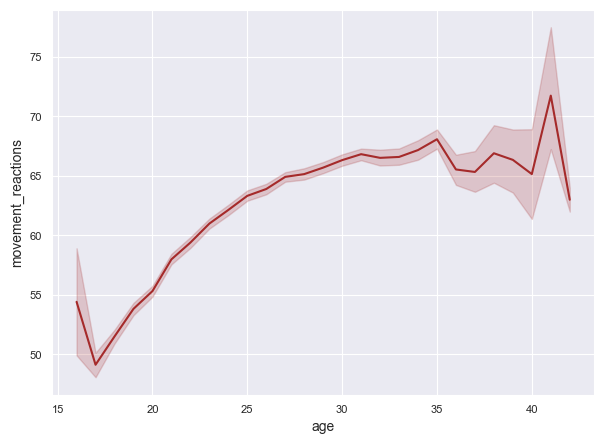

In [272]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.lineplot(x='age',y='movement_reactions',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* At the age 15 to 20 movement eraction is less.
* If player age is increasing player movement reaction also increasing.

#### Impact of Height to Weight

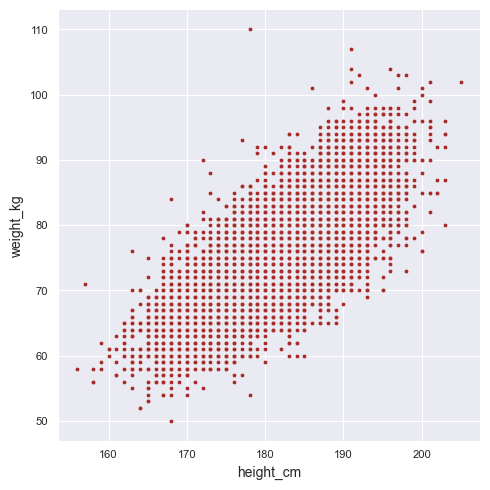

In [273]:
sns.relplot(x='height_cm',y='weight_kg',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* If the players height is increases player weight also increases.

##### RELATION BETWEEN OVERALL AND POTENTIAL WITH RESPECT TO PREFERRED FOOT

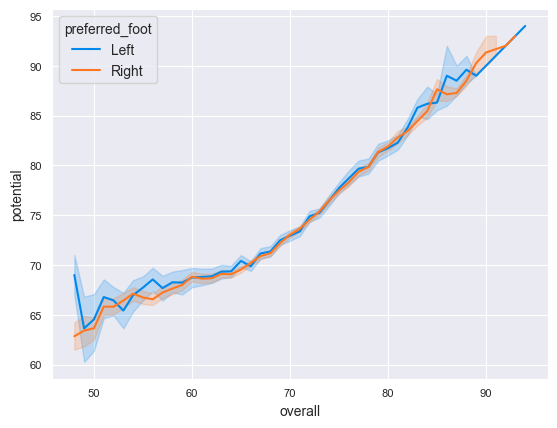

In [274]:
sns.lineplot(x='overall',y='potential',data=fifa_data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If the players overall score is increasing the score of potential also increasing with both foot.

##### RELATION BETWEEN VALUE EUR AND WAGE EURO WITH RESPECT TO PREFERRED FOOT

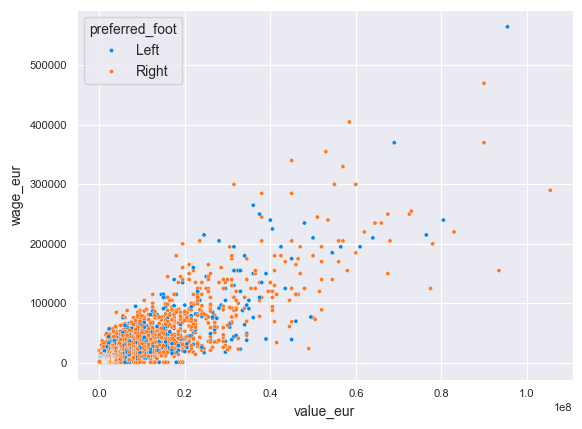

In [275]:
sns.scatterplot(x='value_eur',y='wage_eur',data=fifa_data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If player value is less then the wage of player also less.
* If the value of player is more the wage is silghtly more.

##### IMPACT OF CONTRACT VALID UNTIL TO RELEASE CLAUSE EUR

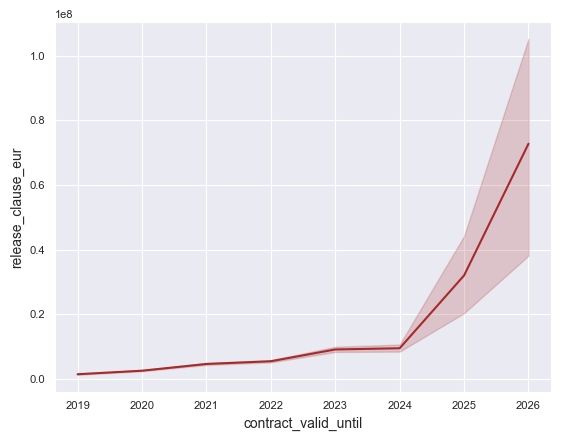

In [276]:
sns.lineplot(x='contract_valid_until',y='release_clause_eur',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* For players untill 2024 the contract has expired or going to expired.
* But from 2024 to 2026 release_caluse is higher against contract valid.s.

##### RELATION BETWEEN PACE AND SHOOTING WITH RESPECT TO PREFERRED FOOT

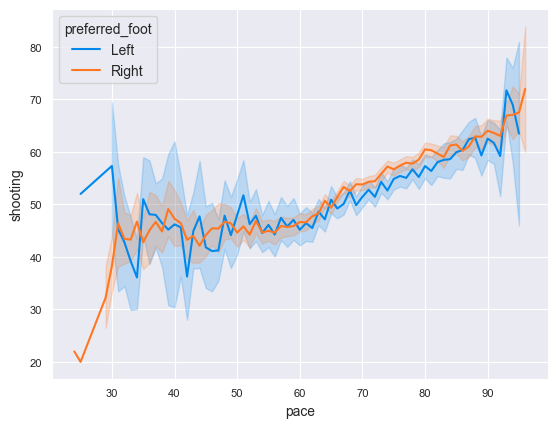

In [277]:
sns.lineplot(x='pace',y='shooting',data=fifa_data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* Shooting is high for left foot when the pace is around 20 and very low aound 20 for right foot.
* But as the pace increases so does the shooting for both the foot.. 

##### IMPCAT OF DRIBBLING TO DEFENDING

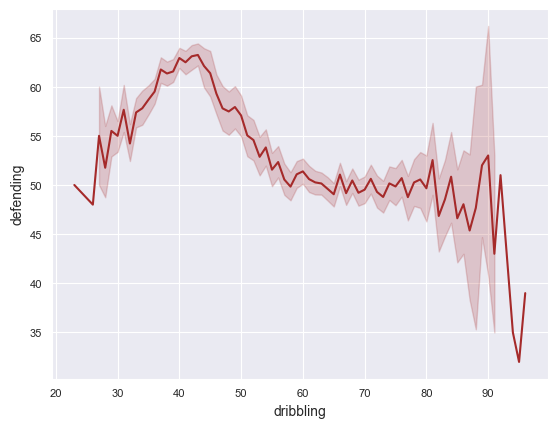

In [278]:
sns.lineplot(x='dribbling',y='defending',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* If the dribbling score is 30 to 50 then the defending score is high.
* As the dribbling increases, defending score decreases.s.

##### IMPACT OF PHYSIC TO ATTACKING CROSSING

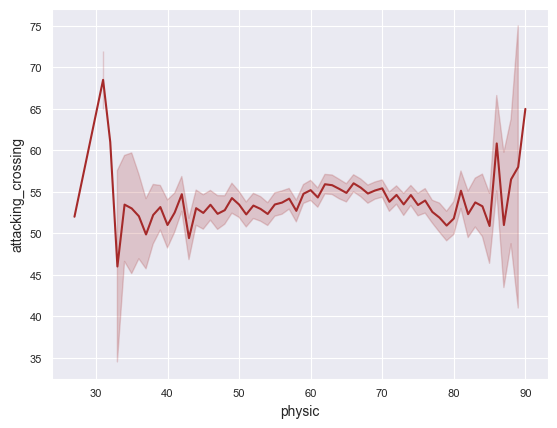

In [279]:
sns.lineplot(x='physic',y='attacking_crossing',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* If the physic is less then the attacking crossing is more.
* Otherwise physic range between 35 to 80 the attacking crossing is constant.

##### IMPACT OF GK DIVING TO GK HANDLING

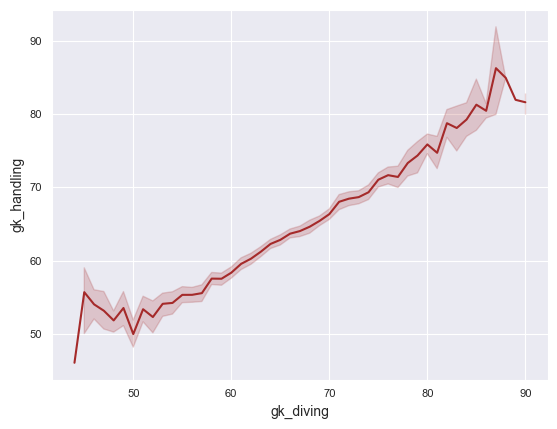

In [280]:
sns.lineplot(x='gk_diving',y='gk_handling',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* If the gk diving score is increases the gk handling score also increases.

##### IMPACT OF GK RELEXES TO GK SPPED

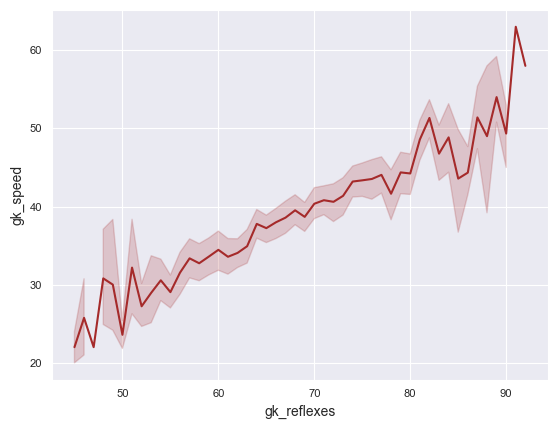

In [281]:
sns.lineplot(x='gk_reflexes',y='gk_speed',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* Less gk reflexes then the gk speed also less.
* More gk reflexes then the gk speed also more.

##### IMPACT OF GK POSITIONING TO GK KICKING

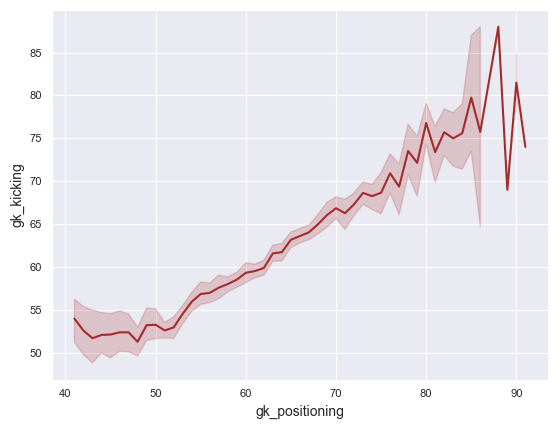

In [282]:
sns.lineplot(x='gk_positioning',y='gk_kicking',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* If the gk positioning score is less then the gk kicking score also less.
* If the gk positioning score is increases then the gk kicking score also increases.

##### IMPACT OF ATTACKING CROSSING TO ATTACKING FINISHING

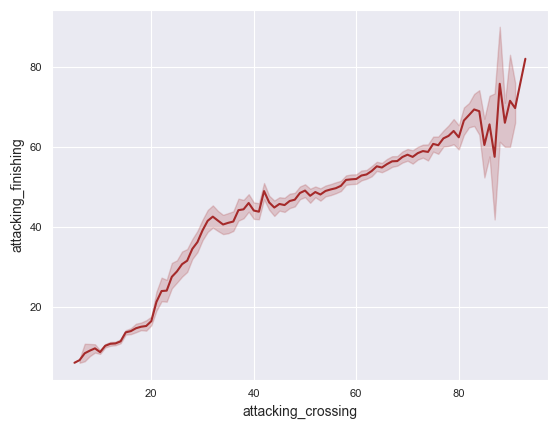

In [283]:
sns.lineplot(x='attacking_crossing',y='attacking_finishing',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* Attcking score between 20 to 40 then attacking finishing score around 40 to 50.
* Either attacking crossing is more than attacking finishing also more.e.

##### IMPACT OF ATTACKING SHORT PASSING TO ATTACKING VOLLEYS

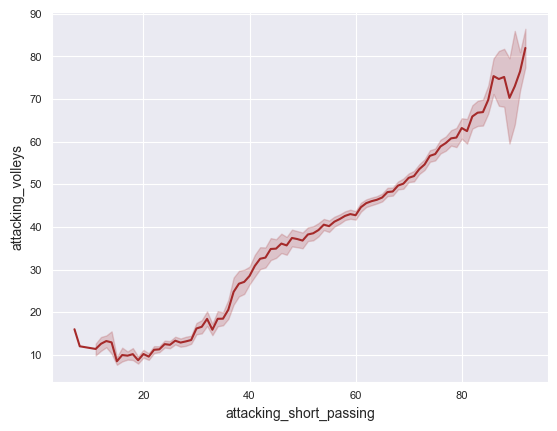

In [284]:
sns.lineplot(x='attacking_short_passing',y='attacking_volleys',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* More attacking short passing then the more attacking volleys.
* Less attacking short passing then the less attacking volleys.

##### IMPACT OF SKILL DRIBBLING TO SKILL BALL CONTROL

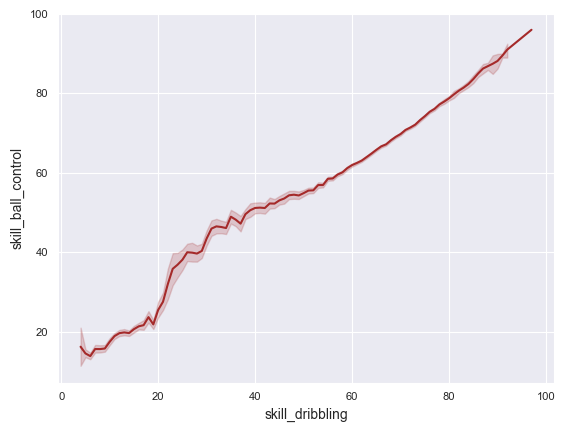

In [285]:
sns.lineplot(x='skill_dribbling',y='skill_ball_control',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* If the dribbling skill is more then ball control skill also more.

##### RELATION BETWEEN SKILL CURVE AND SKILL FK ACCURACY WITH RESPECT TO PREFERRED FOOT

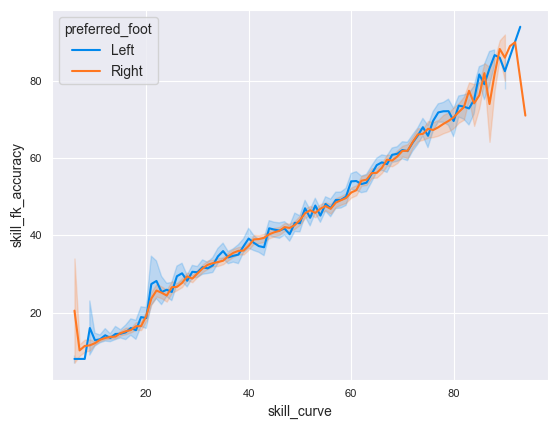

In [286]:
sns.lineplot(x='skill_curve',y='skill_fk_accuracy',data=fifa_data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If skill curve is increases then the skill fk accuracy is also increases with both foot.

##### IMPACT OF SKILL LONG PASSING TO POWER LONG SHOTS

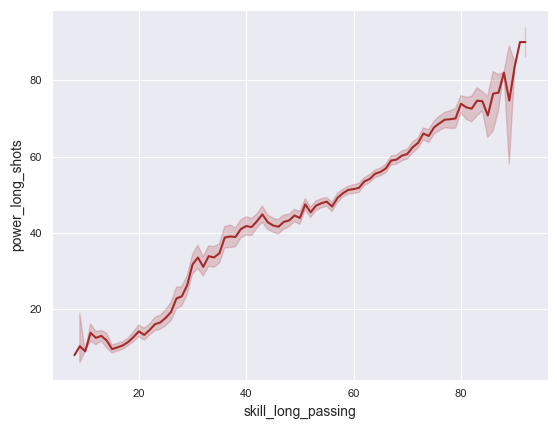

In [287]:
sns.lineplot(x='skill_long_passing',y='power_long_shots',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* More skills of long passing then the increase of power long shots.

##### IMPACT OF MOVEMENT SPRINT SPEED TO MOVEMENT REACTION

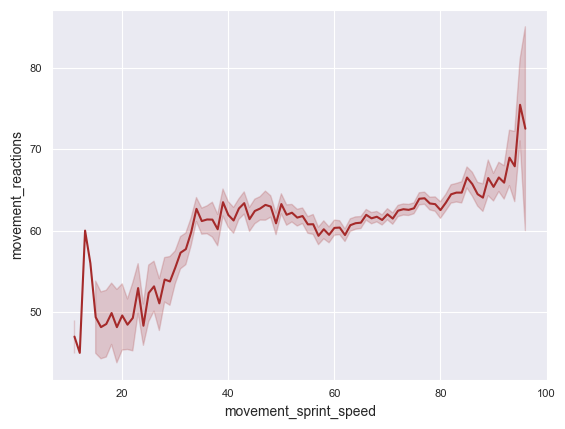

In [288]:
sns.lineplot(x='movement_sprint_speed',y='movement_reactions',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* Movement sprint range around 40 to 100 then the movement reaction is constant otherwise fall in both

##### IMPACT OF POWER SHOT TO POWER STAMINA

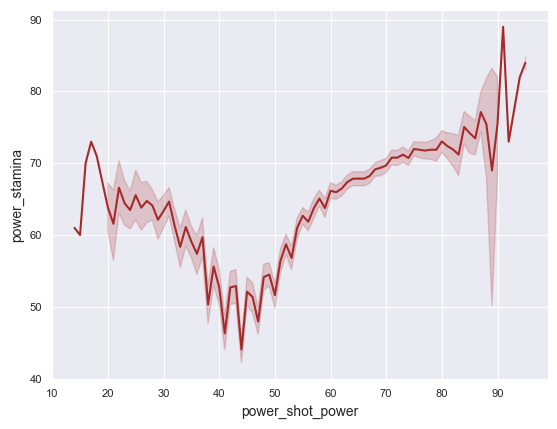

In [289]:
sns.lineplot(x='power_shot_power',y='power_stamina',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* If the power shot range around 30 to 60 then the power stamina is decreases
* If the player has more shot power then the stamina is more.

##### IMPACT OF POWER JUMPING TO POWER STRENGTH

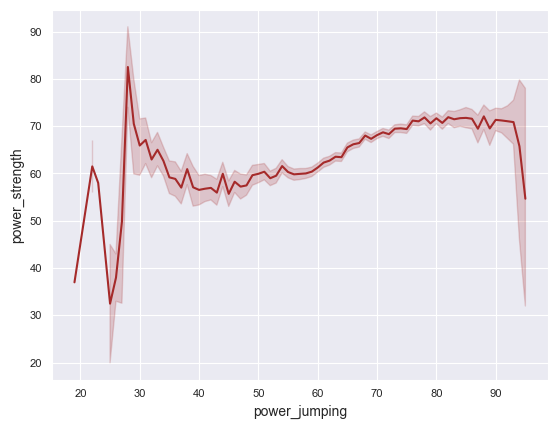

In [290]:
sns.lineplot(x='power_jumping',y='power_strength',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* If the power jumping is 30 then the power strength is more and below 30 power jumping less power strength.
If * Power jumping above 30 then the power strength is constant

##### IMPACT TO MENTALITY AGGRESSION TO MENTALITY POSITIONING

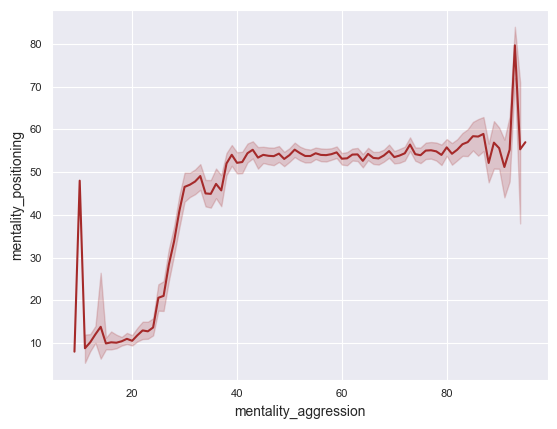

In [291]:
sns.lineplot(x='mentality_aggression',y='mentality_positioning',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* If the mentality aggression around 10 to 30 then the mentality positioning is low
* Below 10 mentality aggression the score of mentality positioning is slightly high. otherwise both metality positioning score is constant.

##### IMPACT OF MENTALITY PENALTIES TO MENTALITY VISION

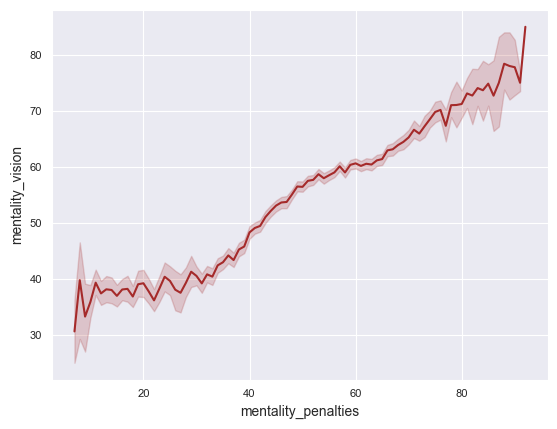

In [292]:
sns.lineplot(x='mentality_penalties',y='mentality_vision',data=fifa_data,color='brown')
plt.show()

##### OBSERVATION:
* If the penalties is increases then the mentality vision also increases.

##### RELATION BETWEEN DEFENDING STANDING TACKLE & DEFENDING SLIDING TACKLE WITH RESPECT TO PREFERRED FOOT

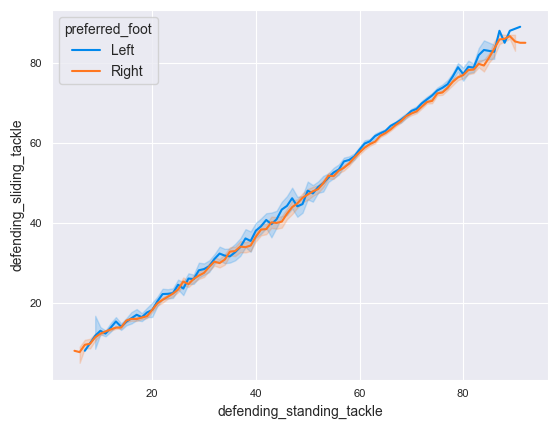

In [293]:
sns.lineplot(x='defending_standing_tackle',y='defending_sliding_tackle',data=fifa_data,color='brown',hue='preferred_foot')
plt.show()

##### OBSERVATION:
* If defending standing tackle is increases then the defending sliding tackle also increases with both foot.

#### RELATION BETWEEN BALL CONTROL & AGILITY

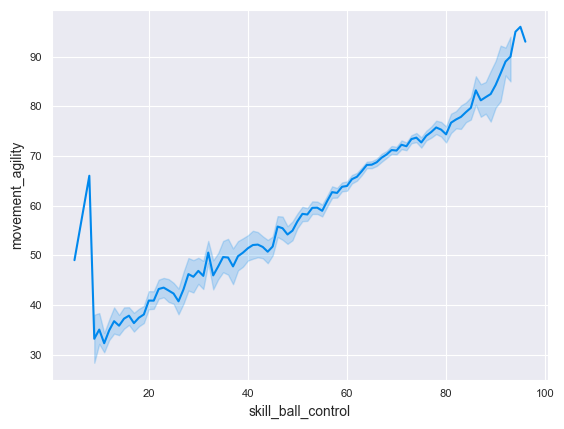

In [294]:
sns.lineplot(y= 'movement_agility', x = 'skill_ball_control', data=fifa_data)
plt.show()

#### Oservation

While ball control allows players to handle the ball effectively, agility helps them move efficiently with or without the ball. A player with excellent ball control but poor agility might struggle to navigate tight spaces or change directions quickly. Conversely, a player with great agility but poor ball control may find it challenging to keep possession or execute precise passes.

* Both have strong relation, as the ball control skill increases, agility increases too.

#### RELATION BETWEEN BLL CONTROL & DRIBBLING

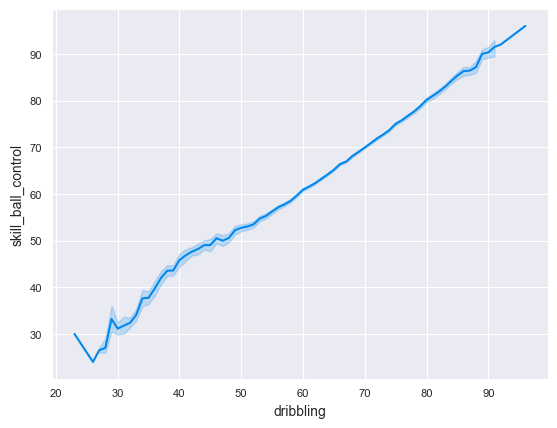

In [295]:
sns.lineplot(y= 'skill_ball_control', x = 'dribbling', data=fifa_data)
plt.show()

#### INFERENCE

Ball control is a foundational skill for effective dribbling. 
Without good ball control, dribbling would be less effective, as poor control can lead to losing possession or making inaccurate dribbles.

During dribbling, a player uses ball control skills to make precise touches and maintain possession while navigating around opponents. 
Good dribbling also requires a player to use ball control to adjust their movements and direction fluidly.

* Dribbling and Ball Control has almost same points.

#### CATEGORICAL VERIABLE 

#### Top 5 players who has highest agility score

In [296]:
top_agility = fifa_data[['overall', 'short_name', 'movement_agility', 'movement_acceleration']].sort_values(by='overall', ascending=False).head(6)
top_agility

overall         short_name  movement_agility  movement_acceleration
0       94           L. Messi                93                     91
1       93  Cristiano Ronaldo                87                     89
2       92          Neymar Jr                96                     94
3       91           J. Oblak                67                     43
4       91          E. Hazard                95                     94
5       91       K. De Bruyne                78                     77

#### Observations

* Messi has highest overall ratings compared to other players
* Ronaldo is in the second place and Naymar follows third place.
* Though both Messi and Ronaldo doesn't have highest agility score, they have good overall ratings.

### Plotting players against agility

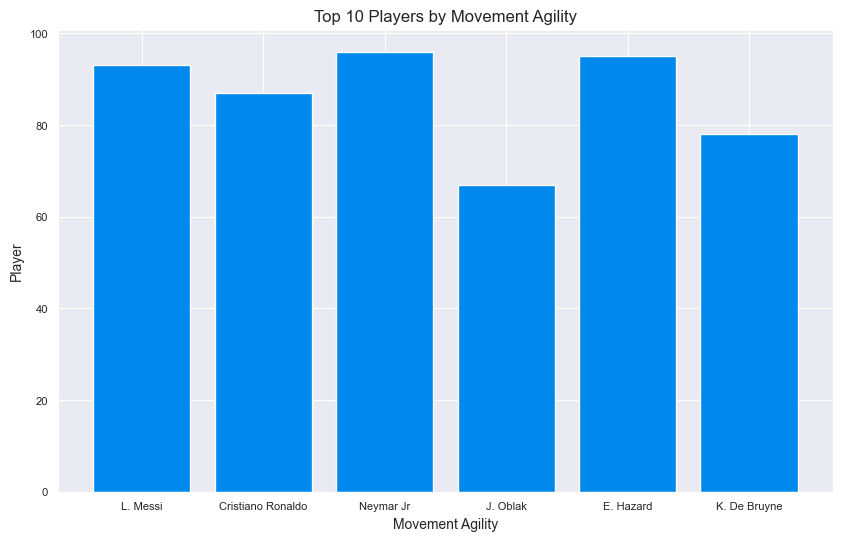

In [297]:
plt.figure(figsize=(10, 6))
plt.bar(top_agility['short_name'], top_agility['movement_agility'], label='Movement Agility')
plt.xlabel('Movement Agility')
plt.ylabel('Player')
plt.title('Top 10 Players by Movement Agility')
# plt.gca().invert_yaxis()  # To have the highest agility on top
# plt.legend()
plt.show()

#### INFERENCE

* Neymar Jr has slightly highest agility score compared to both Messi and Ronaldo
* Hazard Comes in second place

### TOP 5 PLAYERS WITH HIGHEST BALL CONTROL STATS

In [298]:
top_player_ball_control = fifa_data[['short_name', 'skill_ball_control']].sort_values(by= 'skill_ball_control', ascending= False).head(5)
top_player_ball_control

short_name  skill_ball_control
0     L. Messi                  96
2    Neymar Jr                  95
4    E. Hazard                  94
62        Isco                  93
54  L. Insigne                  93

#### Observation

* Messi and Neyman Jr has highest ball control points compared to others
* Ronaldo is not in the top 5.

##### 1. IMPACT OF INTERNATIONAL REPUTATION TO WEAK FOOT

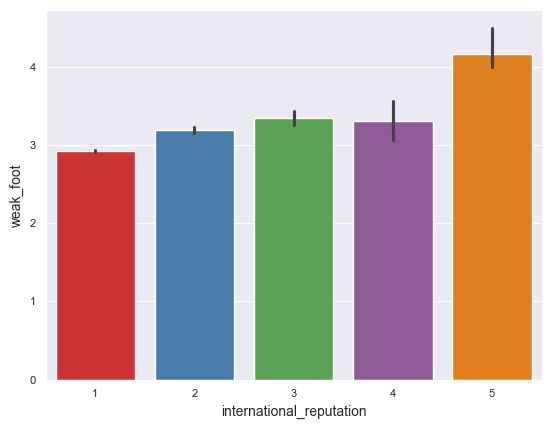

In [299]:
sns.barplot(x='international_reputation',y='weak_foot',data=fifa_data, palette='Set1')
plt.show()

##### OBSERVATION:
* 5 Intrenational reputation rating of player has more than 4 week foot
* 1 international reputation rating player has less than 3 weak foot
* 2, 3, 4 international reputation player has constant weak foot

##### 2. IMPACT OF WORK RATE TO SKILL MOVES

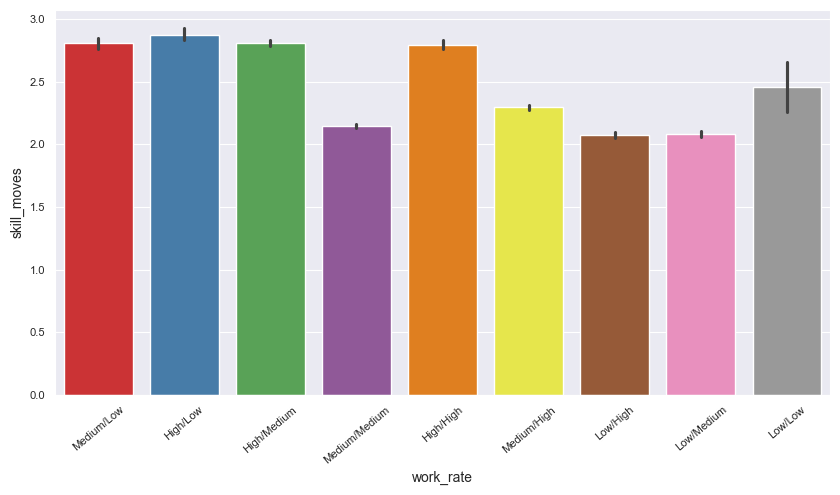

In [300]:
plt.figure(figsize=(10,5))
sns.barplot(x='work_rate',y='skill_moves',data=fifa_data, palette='Set1')
plt.xticks(rotation=40)
plt.show()

##### OBSERVATION:
* In this plot cleary seen that 4 types of work rate[medium/low, high/low, high/medium, high/high] has more than 2.5 skill moves
* Other work rate skill moves is less than 2.5

##### 3.IMPACT OF PREFERRED FOOT TO PACE

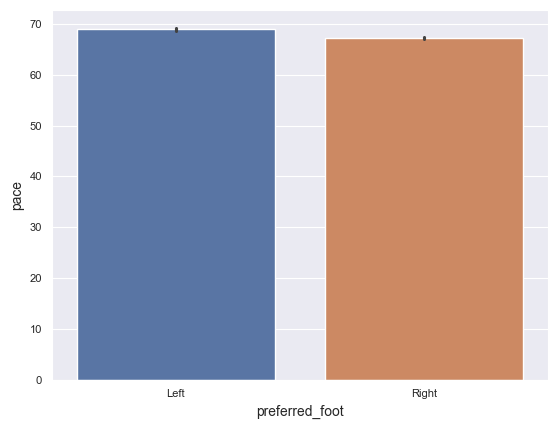

In [301]:
sns.barplot(x='preferred_foot',y='pace',data=fifa_data, palette='deep')
plt.show()

##### OBSERVATION:
* both left and right preferred foot player pace is same.

##### 4.IMPACT OF TEAM POSITION TO SHOOTING

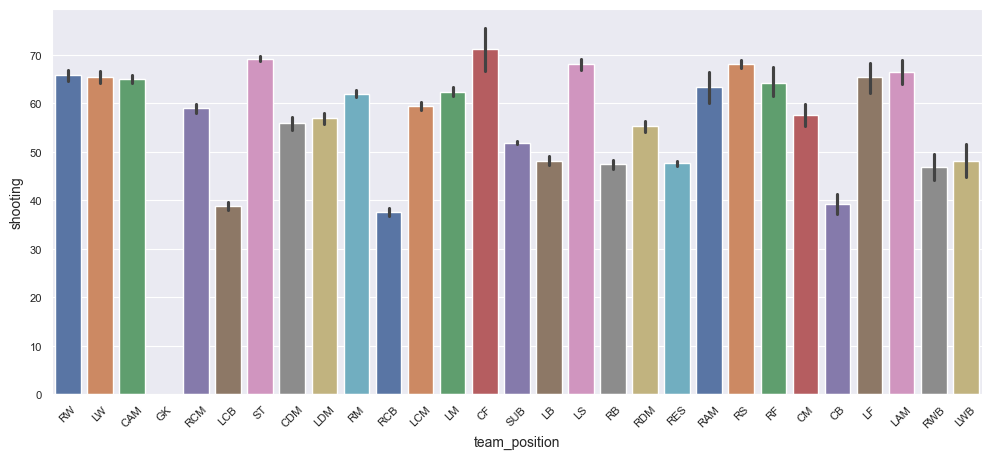

In [302]:
plt.figure(figsize=(12,5))
sns.barplot(x='team_position',y='shooting',data=fifa_data, palette='deep')
plt.xticks(rotation=45)
plt.show()

##### OBSERVATION:
* In this plot we clearly seent that GK team position has no shooting score.
* CF team position has maximum shooting score.

## Task 3:- Explore the data and attempt all the below asked questions in a step by step manner:

- Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
- Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
- Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 
er? 


#### 1.TOP 10 NATIONALITY PLAYER

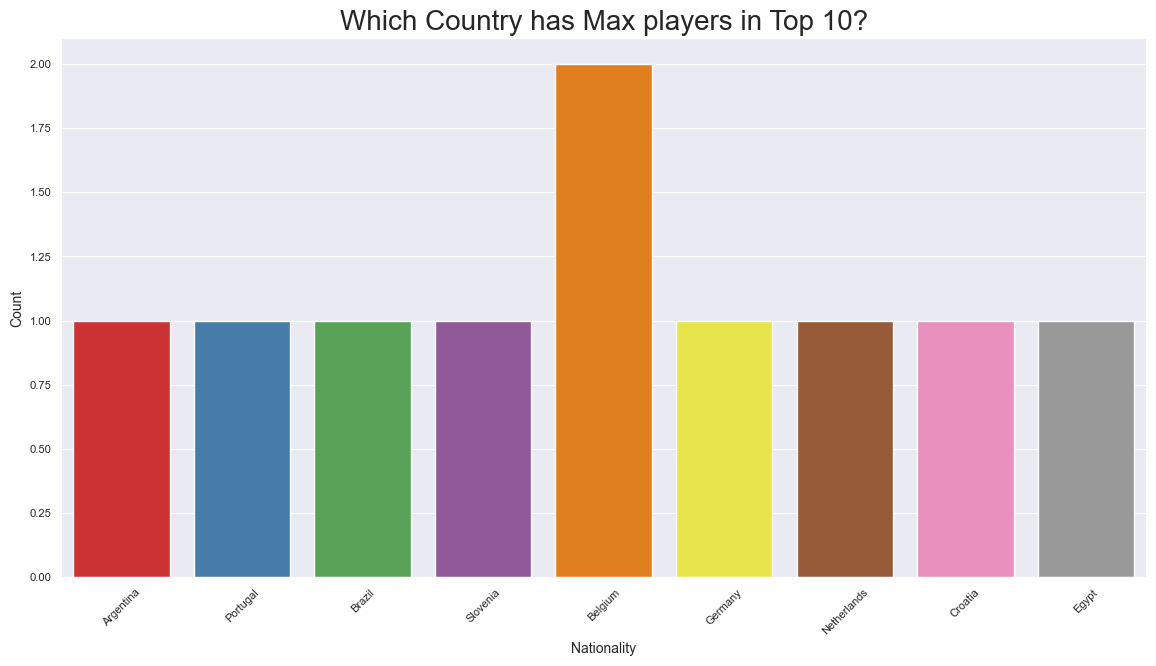

In [303]:
# nationality = fifa_data['nationality'].drop_duplicates().head(10)
# nationality

plt.figure(figsize=(14,7))
sns.countplot(x='nationality',data=fifa_data.drop_duplicates().head(10),palette='Set1')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Which Country has Max players in Top 10?',fontsize = 20)
plt.show()

##### OBSERVATION:
* Most of the belgium country playesrare  io 1
* Other countries have almost same players0

#### 1.a. Distribution of overall rating vs. age of players. 

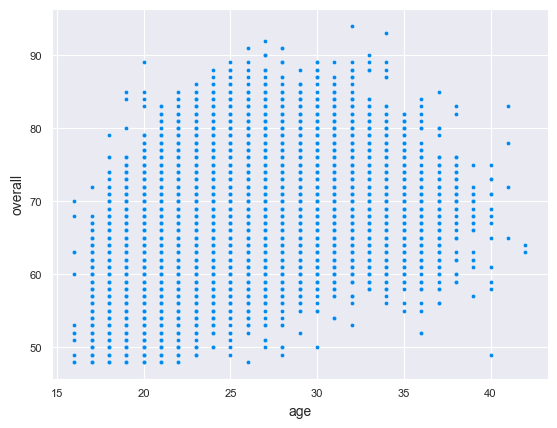

In [304]:
sns.scatterplot(x = 'age', y = 'overall', data=fifa_data)
plt.show()

#### Observations

- Early Career: Players generally see a rise in their overall rating as they gain experience in their early to mid-20s.
- Peak Performance: The rating may continue to rise until it peaks around late 20s to early 30s.
- Stabilization/Decline: After reaching a peak, the overall rating may stabilize or start to decline as players age beyond a certain point (e.g., after age 32).

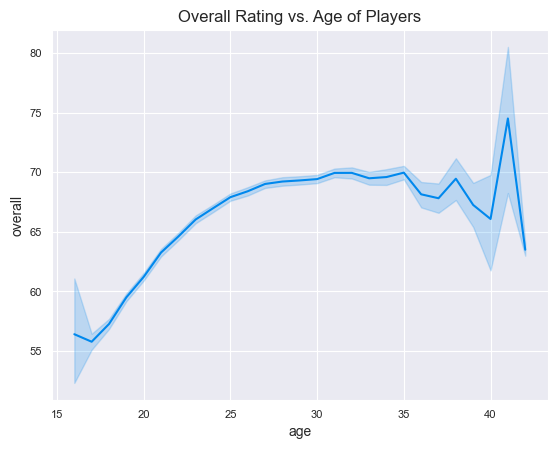

In [305]:
sns.lineplot(x='age', y = 'overall', data=fifa_data)
plt.title('Overall Rating vs. Age of Players')
plt.show()

##### OBSERVATION:
* As age increases overall perform decreases
* For ages between 20 to 30 overall performance was stagnant, means was about 70.0
* After 30 years of age the players seems to stop improving.

#### 1.b. Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 

In [306]:
# Define a function to categorize positions
def categorize_position(positions):
    if 'ST' in positions or 'CF' in positions:
        return 'Striker'
    elif 'RW' in positions:
        return 'Right-Winger'
    elif 'LW' in positions:
        return 'Left-Winger'
    else:
        return 'Other'

# Apply the function to categorize positions
fifa_data['position_category'] = fifa_data['player_positions'].apply(categorize_position)

# Filter out 'Other' positions
data_filtered = fifa_data[fifa_data['position_category'] != 'Other']

In [307]:
mean_wages = data_filtered.groupby('position_category')['wage_eur'].mean()
print(mean_wages)

position_category
Left-Winger     12064.417178
Right-Winger    12476.495726
Striker         10956.258993
Name: wage_eur, dtype: float64


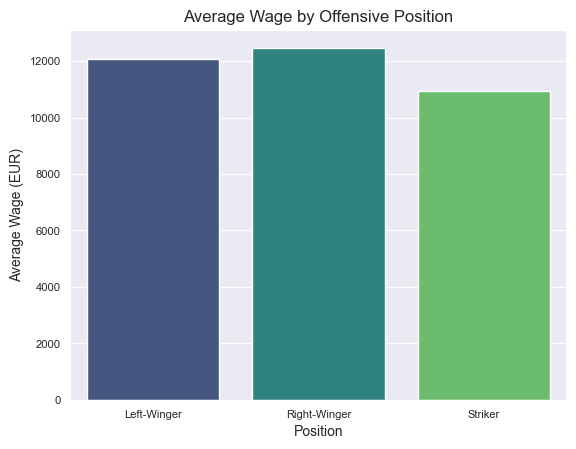

In [308]:
# Plot average wages by position category
sns.barplot(x=mean_wages.index, y=mean_wages.values, palette='viridis')
plt.title('Average Wage by Offensive Position')
plt.xlabel('Position')
plt.ylabel('Average Wage (EUR)')
plt.show()

#### Observation

- Right-Winger tend to be the highest paid, reflecting their crucial role in scoring goals.
- Left-Winger also well-compensated but less so than Right-Winger
- Stikers tend to earn less on average compared to both strikers and right-wingers.

##### 2.TOP 10 CLUB PLAYER

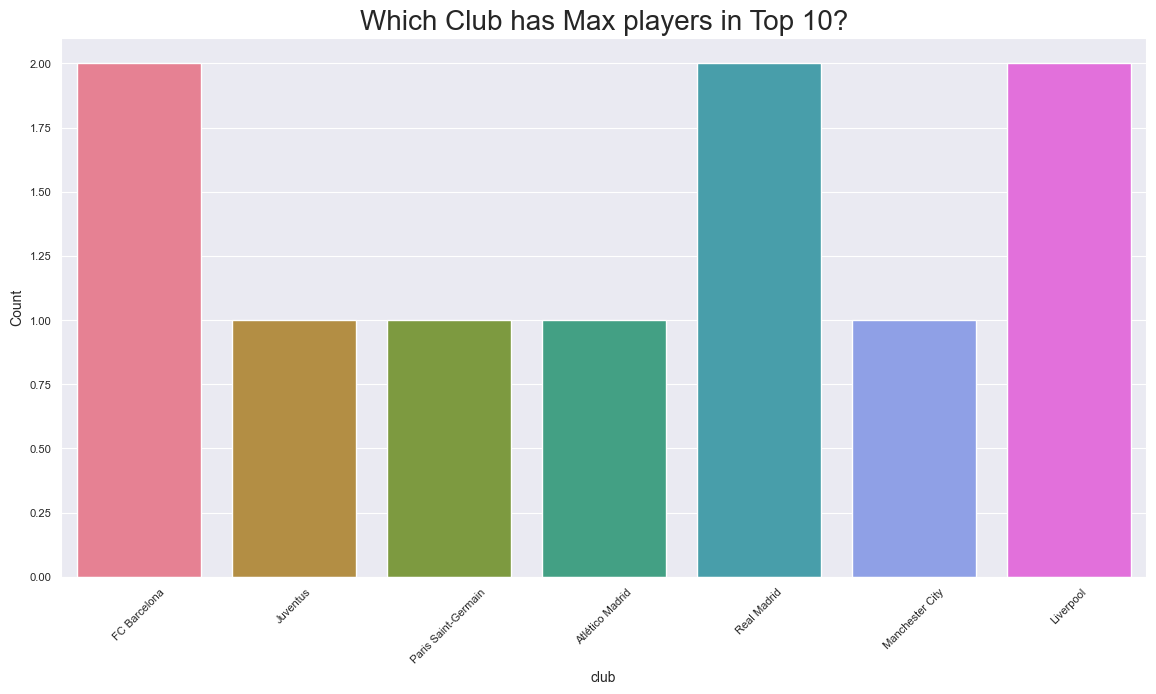

In [309]:
plt.figure(figsize=(14,7))
sns.countplot(x='club',data=fifa_data.head(10),palette='husl')
plt.xlabel('club')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Which Club has Max players in Top 10?',fontsize = 20)
plt.show()

##### OBSERVATION:
* most of the Fc Barcelona. real madrid, and liver pool club player in top 10.

##### 3.TEAM POSITION IN TOP 10

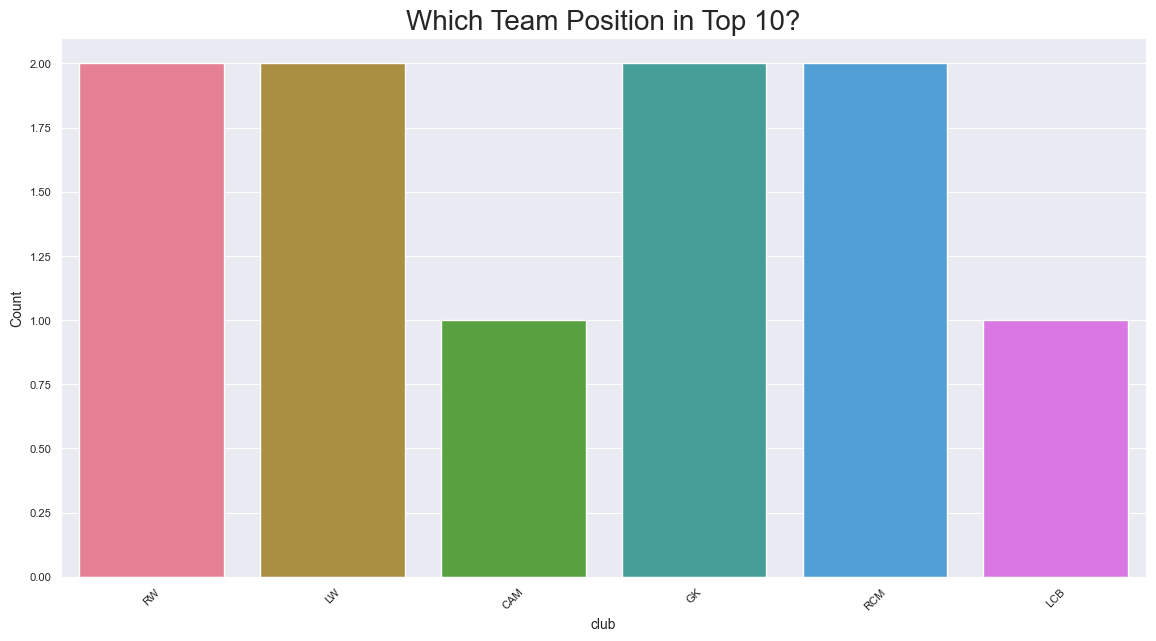

In [310]:
plt.figure(figsize=(14,7))
sns.countplot(x='team_position',data=fifa_data.head(10),palette='husl')
plt.xlabel('club')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Which Team Position in Top 10?',fontsize = 20)
plt.show()

##### OBSERVATION:
* Most of the RW, LW, GK, RCM  team position in top 10

##### 4.CAMPARE MESSI VS RONALDO

In [311]:
feature = fifa_data[['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']]
compare = feature.head(2)
compare = compare.set_index('short_name')
compare.head()

overall  potential  pace  shooting  passing  dribbling  \
short_name                                                                  
L. Messi                94         94  87.0      92.0     92.0       96.0   
Cristiano Ronaldo       93         93  90.0      93.0     82.0       89.0   

                   defending  physic  
short_name                            
L. Messi                39.0    66.0  
Cristiano Ronaldo       35.0    78.0

#### Observations

- Messi and Ronaldo seems to be doing equal, in some areas Messi is better and in some Ronaldo is better
- But in defending Ronaldo seems not great compared to Messi
- In physic Ronaldo is way better than Messi

In [313]:
players_of_interest = ['L. Messi', 'Cristiano Ronaldo']
data_filtered = fifa_data[fifa_data['short_name'].isin(players_of_interest)]

In [314]:
comparison_data = data_filtered[['short_name', 'player_positions', 'wage_eur', 'overall']]
print(comparison_data)

          short_name player_positions  wage_eur  overall
0           L. Messi       RW, CF, ST    565000       94
1  Cristiano Ronaldo           ST, LW    405000       93


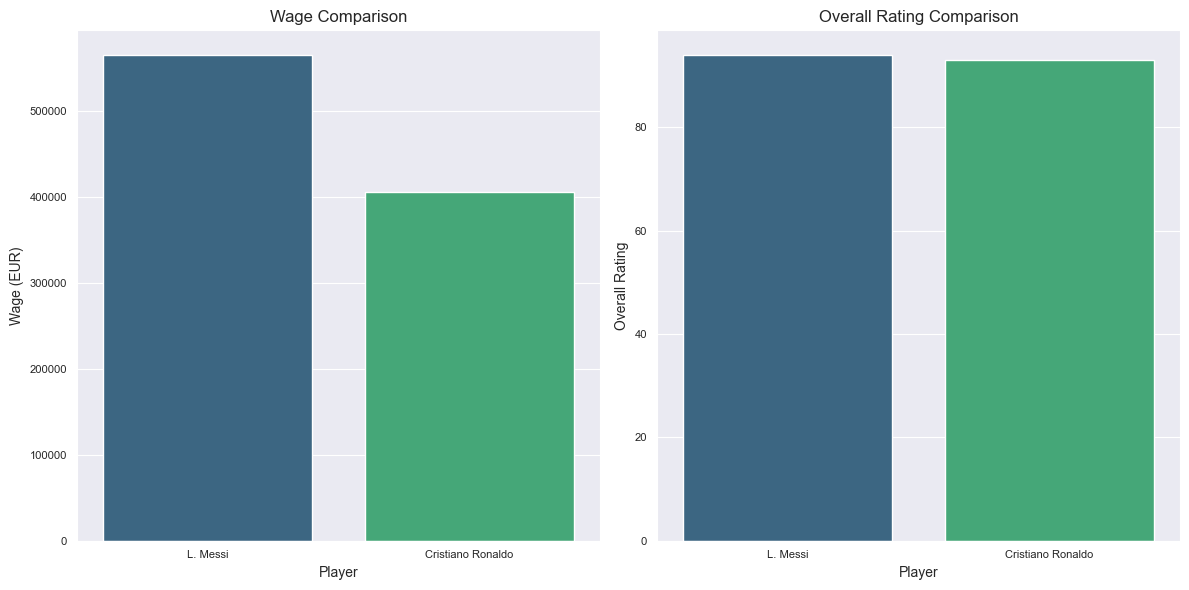

In [315]:
# Plot wages
plt.figure(figsize=(12, 6))

# Plotting wages
plt.subplot(1, 2, 1)
sns.barplot(x='short_name', y='wage_eur', data=comparison_data, palette='viridis')
plt.title('Wage Comparison')
plt.xlabel('Player')
plt.ylabel('Wage (EUR)')

# Plotting overall ratings
plt.subplot(1, 2, 2)
sns.barplot(x='short_name', y='overall', data=comparison_data, palette='viridis')
plt.title('Overall Rating Comparison')
plt.xlabel('Player')
plt.ylabel('Overall Rating')

plt.tight_layout()
plt.show()

#### Observations

- Compared to Messi, Ronalodo earns less
- Both Messi and Ronalodo have alomost equal Overall ratings.

##### 5.GET TOP 5 MAXIMUM VALUE PLAYER WITH MINIMUM RELEASE

In [316]:
fifa_data.sort_values(by=['value_eur','release_clause_eur'],ascending=[0,1]).head()

short_name  age  height_cm  weight_kg nationality                 club  \
2      Neymar Jr   27        175         68      Brazil  Paris Saint-Germain   
0       L. Messi   32        170         72   Argentina         FC Barcelona   
10     K. Mbappé   20        178         73      France  Paris Saint-Germain   
5   K. De Bruyne   28        181         70     Belgium      Manchester City   
4      E. Hazard   28        175         74     Belgium          Real Madrid   

    overall  potential  value_eur  wage_eur player_positions preferred_foot  \
2        92         92  105500000    290000          LW, CAM          Right   
0        94         94   95500000    565000       RW, CF, ST           Left   
10       89         95   93500000    155000           ST, RW          Right   
5        91         91   90000000    370000          CAM, CM          Right   
4        91         91   90000000    470000           LW, CF          Right   

    international_reputation  weak_foot  skill_moves    work_rate body_type  \
2                          5          5            5  High/Medium    Neymar   
0                          5          4            4   Medium/Low     Messi   
10                         3          4            5     High/Low    Normal   
5                          4          5            4    High/High    Normal   
4                          4          4            4  High/Medium    Normal   

    release_clause_eur                                        player_tags  \
2          195200000.0  #Speedster, #Dribbler, #Playmaker  , #Crosser,...   
0          195800000.0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...   
10         191700000.0                    #Speedster, #Dribbler, #Acrobat   
5          166500000.0  #Dribbler, #Playmaker  , #Engine, #Distance Sh...   
4          184500000.0                    #Speedster, #Dribbler, #Acrobat   

   team_position  team_jersey_number      joined  contract_valid_until  \
2            CAM                10.0  2017-08-03                2022.0   
0             RW                10.0  2004-07-01                2021.0   
10            RW                 7.0  2018-07-01                2022.0   
5            RCM                17.0  2015-08-30                2023.0   
4             LW                 7.0  2019-07-01                2024.0   

   nation_position  pace  shooting  passing  dribbling  defending  physic  \
2               LW  91.0      85.0     87.0       95.0       32.0    58.0   
0              NaN  87.0      92.0     92.0       96.0       39.0    66.0   
10              RM  96.0      84.0     78.0       90.0       39.0    75.0   
5              RCM  76.0      86.0     92.0       86.0       61.0    78.0   
4               LF  91.0      83.0     86.0       94.0       35.0    66.0   

    gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
2         NaN          NaN         NaN          NaN       NaN             NaN   
0         NaN          NaN         NaN          NaN       NaN             NaN   
10        NaN          NaN         NaN          NaN       NaN             NaN   
5         NaN          NaN         NaN          NaN       NaN             NaN   
4         NaN          NaN         NaN          NaN       NaN             NaN   

                                        player_traits  attacking_crossing  \
2   Power Free-Kick, Injury Free, Selfish, Early C...                  87   
0   Beat Offside Trap, Argues with Officials, Earl...                  88   
10  Beat Offside Trap, Selfish, Early Crosser, Spe...                  78   
5   Power Free-Kick, Avoids Using Weaker Foot, Div...                  93   
4   Beat Offside Trap, Selfish, Finesse Shot, Spee...                  81   

    attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
2                    87                          62                       87   
0                    95                          70                       92   
10            

## DATA PREPROCESSING / FEATURE ENGINEERING

### 1.CHECK MISSING VALUE

In [317]:
fifa_data.shape

(18278, 98)

In [318]:
# Check for missing values
missing_values = fifa_data.isnull().sum().sort_values(ascending=False)

# Display columns with missing values
print(missing_values[missing_values > 0])

nation_position         17152
player_tags             16779
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
shooting                 2036
dribbling                2036
defending                2036
physic                   2036
cam                      2036
lam                      2036
rw                       2036
rf                       2036
cf                       2036
lf                       2036
lw                       2036
rs                       2036
st                       2036
ls                       2036
ram                      2036
passing                  2036
pace                     2036
rm                       2036
rb                       2036
rcb                      2036
cb                       2036
lcb                      2036
lb                       2036
rwb                      2036
rdm       

Out of 18000 data, few features have around 16 10 17000 missing values and others have around 2300.

We are going to hadle those missing values at later stage.

Finding the percentage of the missing values so that we can impute with the suitable central tendency.

In [319]:
def extract_features_with_missing(data, threshold=15):
    # Calculate the number of missing values
    missing_numbers = data.isnull().sum()
    
    # Calculate the percentage of missing values
    missing_percentage = (missing_numbers / len(data)) * 100
    
    # Create a DataFrame to summarize missing values
    missing_summary = pd.DataFrame({
        'Missing Number': missing_numbers,
        'Missing Percentage': missing_percentage
    })
    
    # Filter columns where the missing percentage is greater than or equal to the threshold
    filtered_summary = missing_summary[(missing_summary['Missing Percentage'] <= threshold) & (missing_summary['Missing Percentage'] != 0)]
    
    # Extract feature names from the filtered summary
    features_with_missing = filtered_summary.index.tolist()
    
    return features_with_missing

In [320]:
features_with_missing = extract_features_with_missing(fifa_data)
print("Features with missing values <= 15%:", features_with_missing)
print(len(features_with_missing))

Features with missing values <= 15%: ['release_clause_eur', 'team_position', 'team_jersey_number', 'joined', 'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
37


* the features have less than 15% missing values, so we are imputing them..

### 2.IMPUTE MISSING VALUE
##### CHECKING THE DISTRIBUTION BEFORE IMPUTE MISSING VALUE
##### 1.NUMERICAL

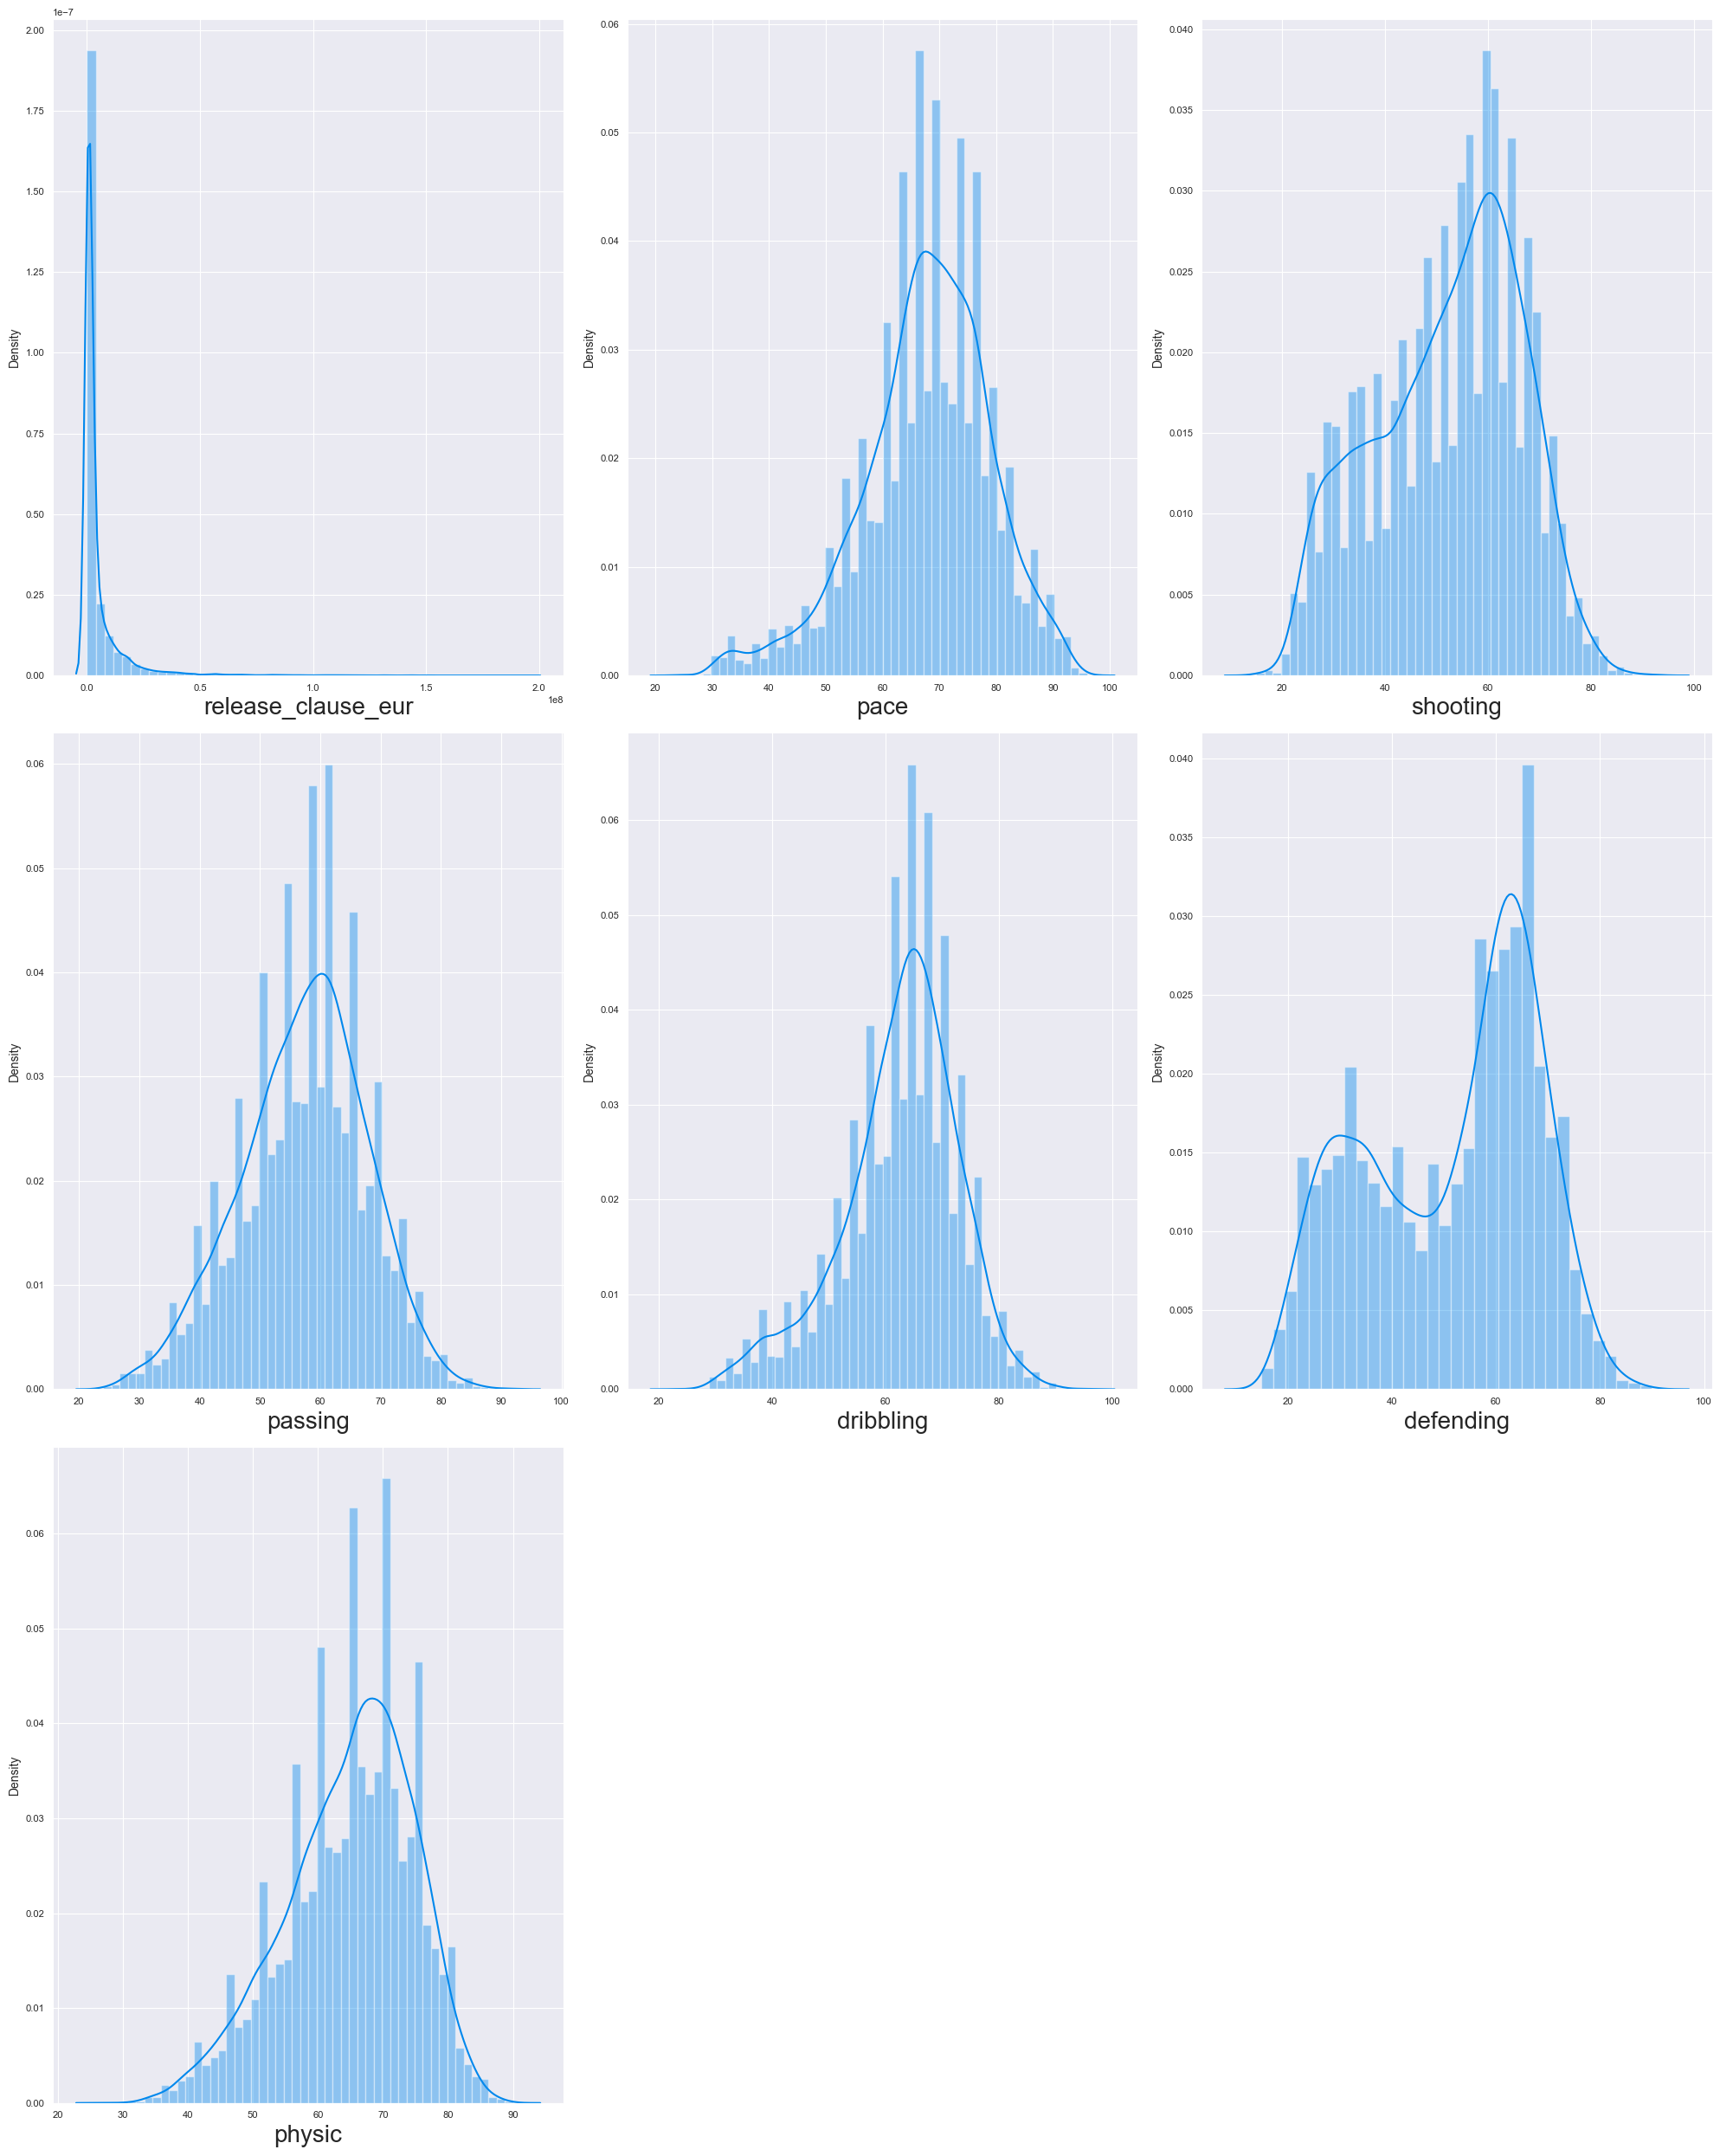

In [321]:
dist = fifa_data[['release_clause_eur','pace','shooting','passing','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in dist: # iteration of columns / acessing the columns from  dataset 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=dist[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

# Impute missing value using median because distribution is not normal

In [322]:
def missing_value_impute(data):
    for column in dist:
        data.loc[data[column].isnull()==True, column] = data[column].median()

In [323]:
missing_value_impute(fifa_data)

In [324]:
# check missing value after imputation
columns = dist.columns
fifa_data[columns].apply(lambda x : x.isnull().sum())

release_clause_eur    0
pace                  0
shooting              0
passing               0
dribbling             0
defending             0
physic                0
dtype: int64

##### 2.CATEGORICAL

In [325]:
# Get the value counts
fifa_data.team_position.value_counts().head()

team_position
SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
Name: count, dtype: int64

In [326]:
# Impute categorical data using mode(most freqent)
fifa_data['team_position'] = fifa_data['team_position'].replace(np.nan,'SUB')

In [327]:
# Check missing value after imputation
fifa_data['team_position'].isnull().sum()

0

## Task 2:- Explore football skills and cluster football players based on their attributes.

### 3.HANDLING CATEGORICAL DATA

* In this data only preferred foot and team position features are important and remaining all are unique.

##### 1.PREFERRED FOOT 

In [328]:
# Gettimg value counts of preferred foot
fifa_data.preferred_foot.value_counts()

preferred_foot
Right    13960
Left      4318
Name: count, dtype: int64

In [329]:
# right is assign with 1 because of majority and most freqent
# left is assign with 0 because of less no
fifa_data.preferred_foot = fifa_data.preferred_foot.map({'Right':1,'Left':0})

##### 2.TEAM POSITION

In [330]:
# Getting the value counts of team position
fifa_data.team_position.value_counts()

team_position
SUB    8060
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: count, dtype: int64

In [331]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
fifa_data['team_position'] = encoder.fit_transform(fifa_data['team_position'])

In [332]:
fifa_data.team_position.unique()

array([25, 14,  0,  5, 19,  8, 27,  2, 10, 23, 18,  9, 12,  3, 28,  7, 13,
       17, 20, 21, 16, 24, 22,  4,  1, 11,  6, 26, 15])

### 4.OUTLIER HANDLING

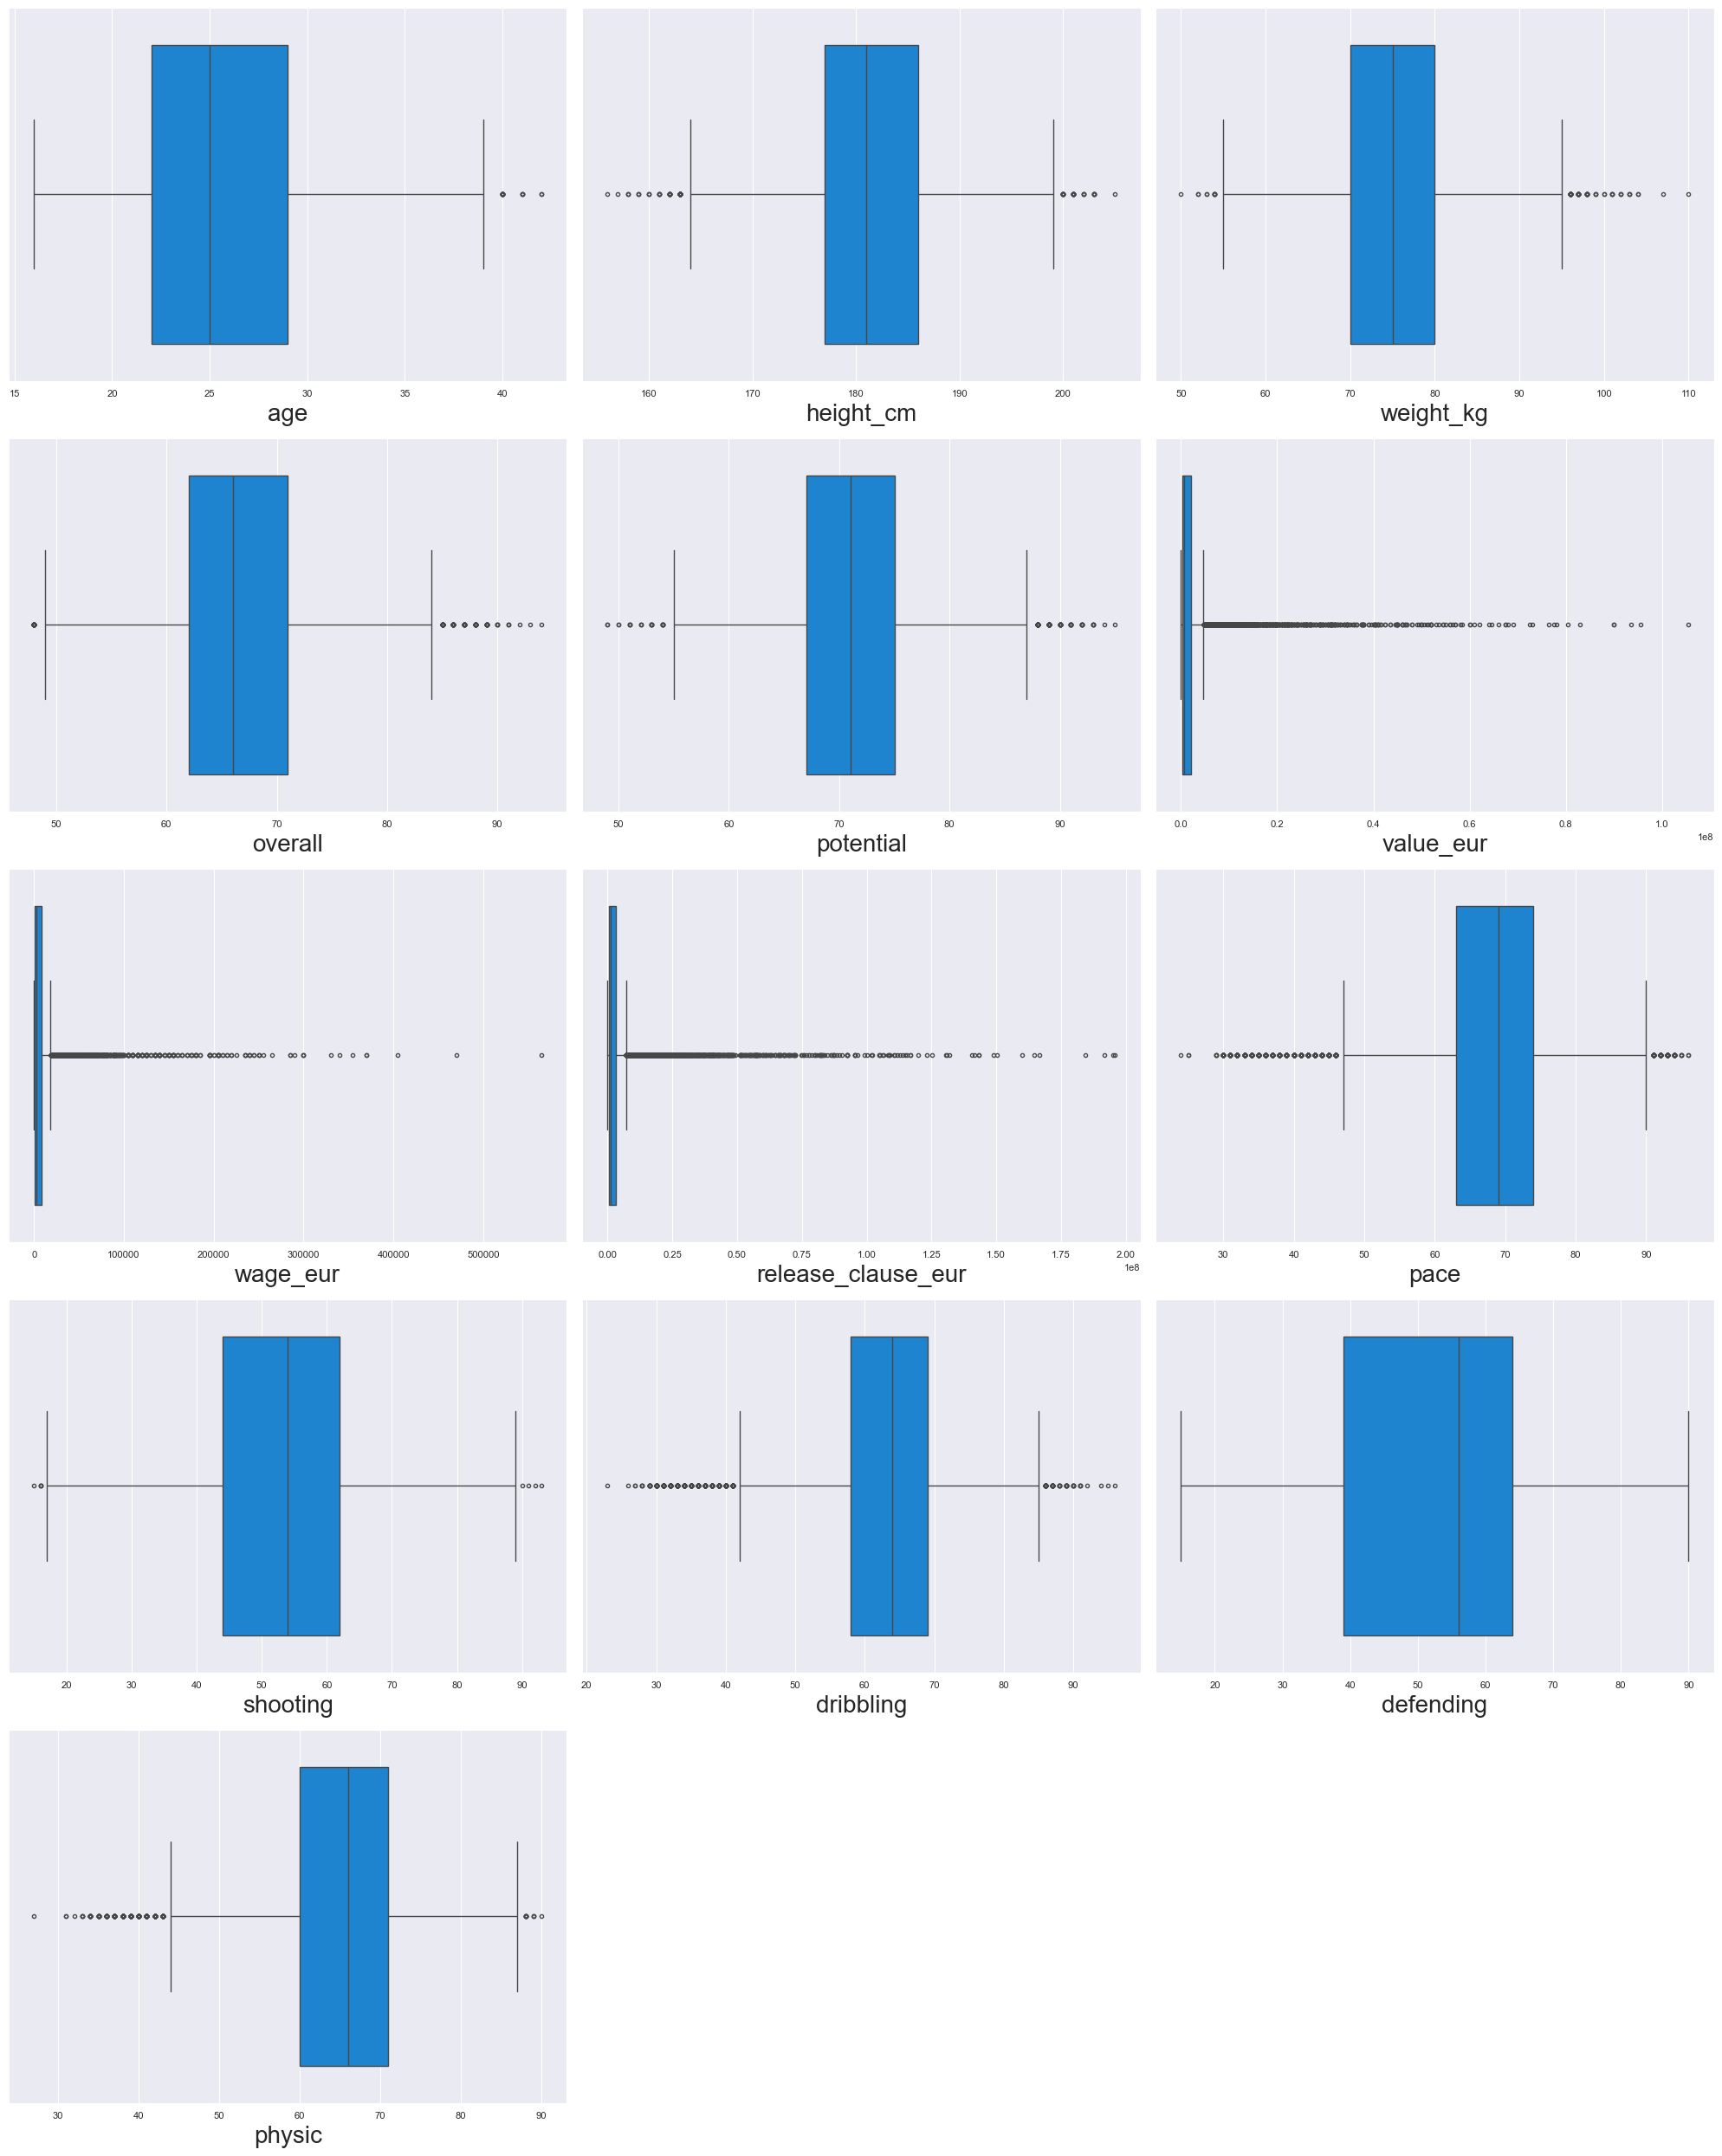

In [333]:
out = fifa_data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=16:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.boxplot(x=out[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

##### CHECKING THE DISTRIBUTION BEFORE HANDLE THE OUTLIER

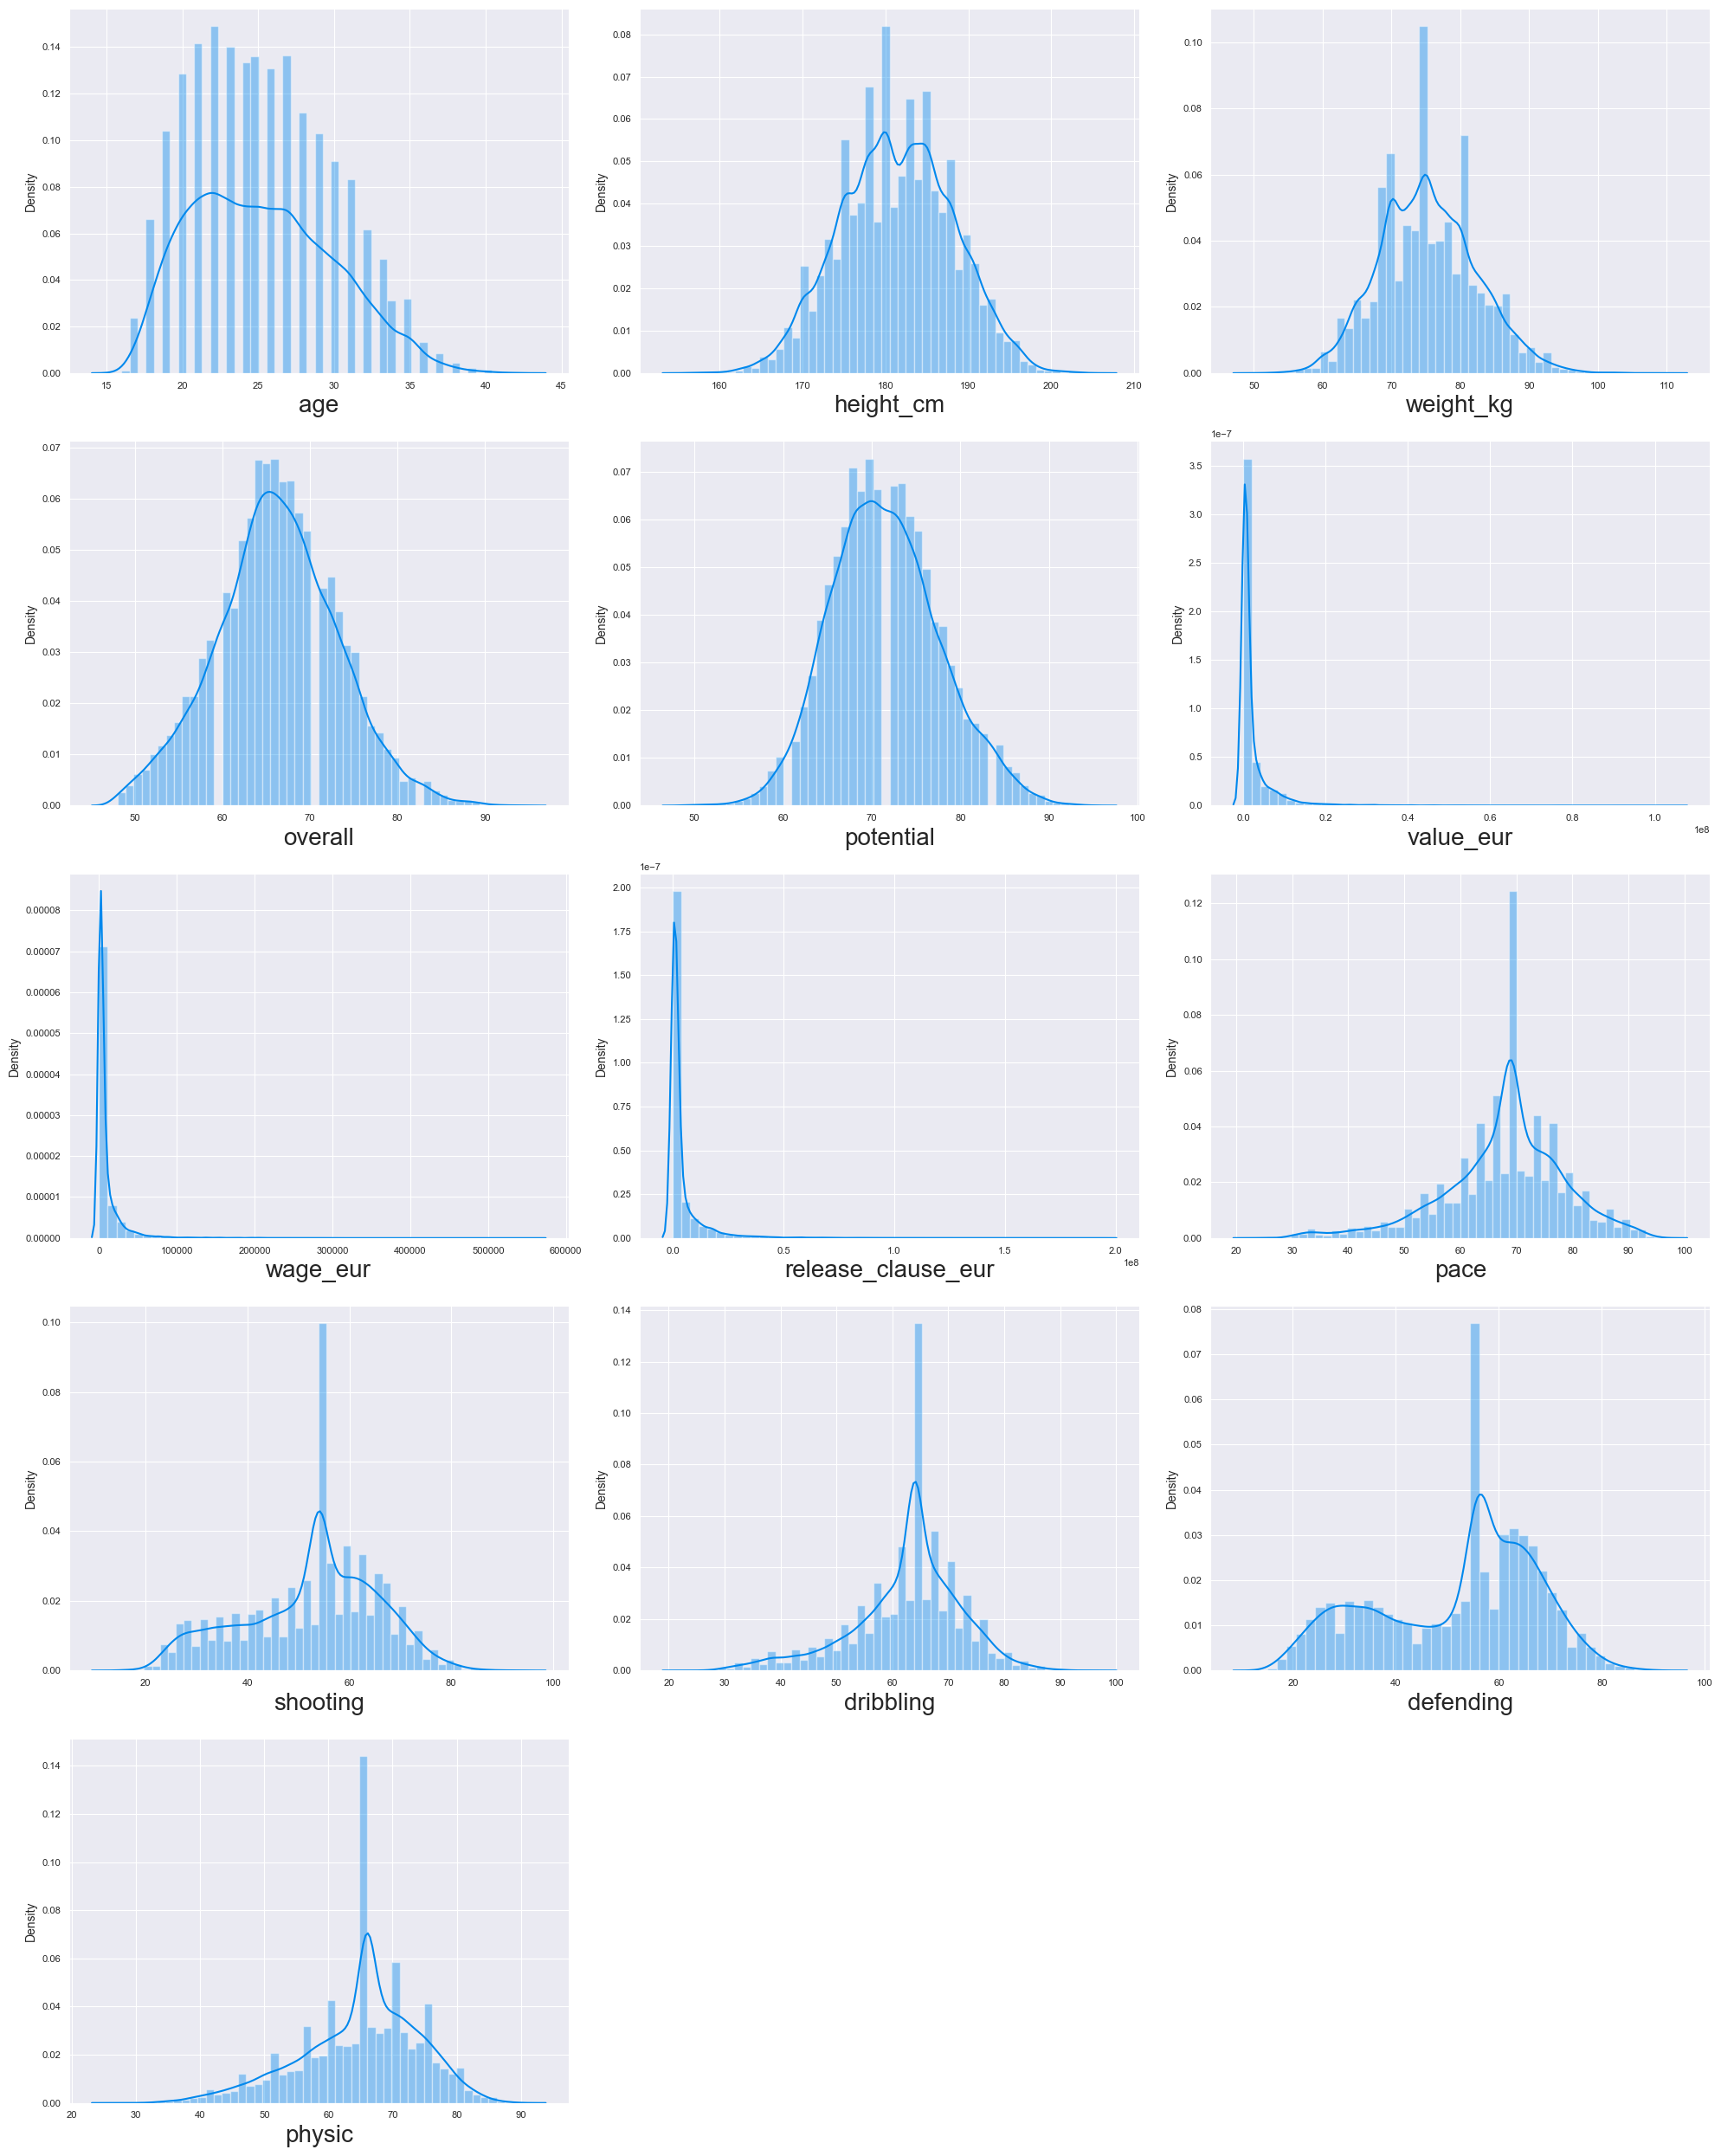

In [334]:
# dist_out = fifa_data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
#            'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=15:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=out[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

* Here age,height_cm,weight_kg,overall,potential follows a normal distribution
* so we use empherical rule and remaining features we use iqr

##### EMPHERICAL RULE OR 3 STANDARD DEVIATION RULE TO DETECT THE OUTLIER

In [335]:
column_empherical = ['age', 'height_cm', 'weight_kg', 'overall', 'potential']

def outlier_impute(data):
    for column in column_empherical:
        #upper limit
        upper_limit = data[column].mean() + 3*data[column].std()
        #percentage 
        upper_limit_percent = len(data.loc[data[column] > upper_limit])/18278*100
        #lower limit
        lower_limit = data[column].mean() - 3*data[column].std()
        # lower limit percentage
        lower_limit_percent = len(data.loc[data['weight_kg'] < lower_limit])/18278*100
        # imputing with mean
        data.loc[data[column] > upper_limit,column]=data[column].mean()
        data.loc[data[column] < lower_limit, column] = data[column].mean()

In [336]:
outlier_impute(fifa_data)

#### checking outliers after imputation

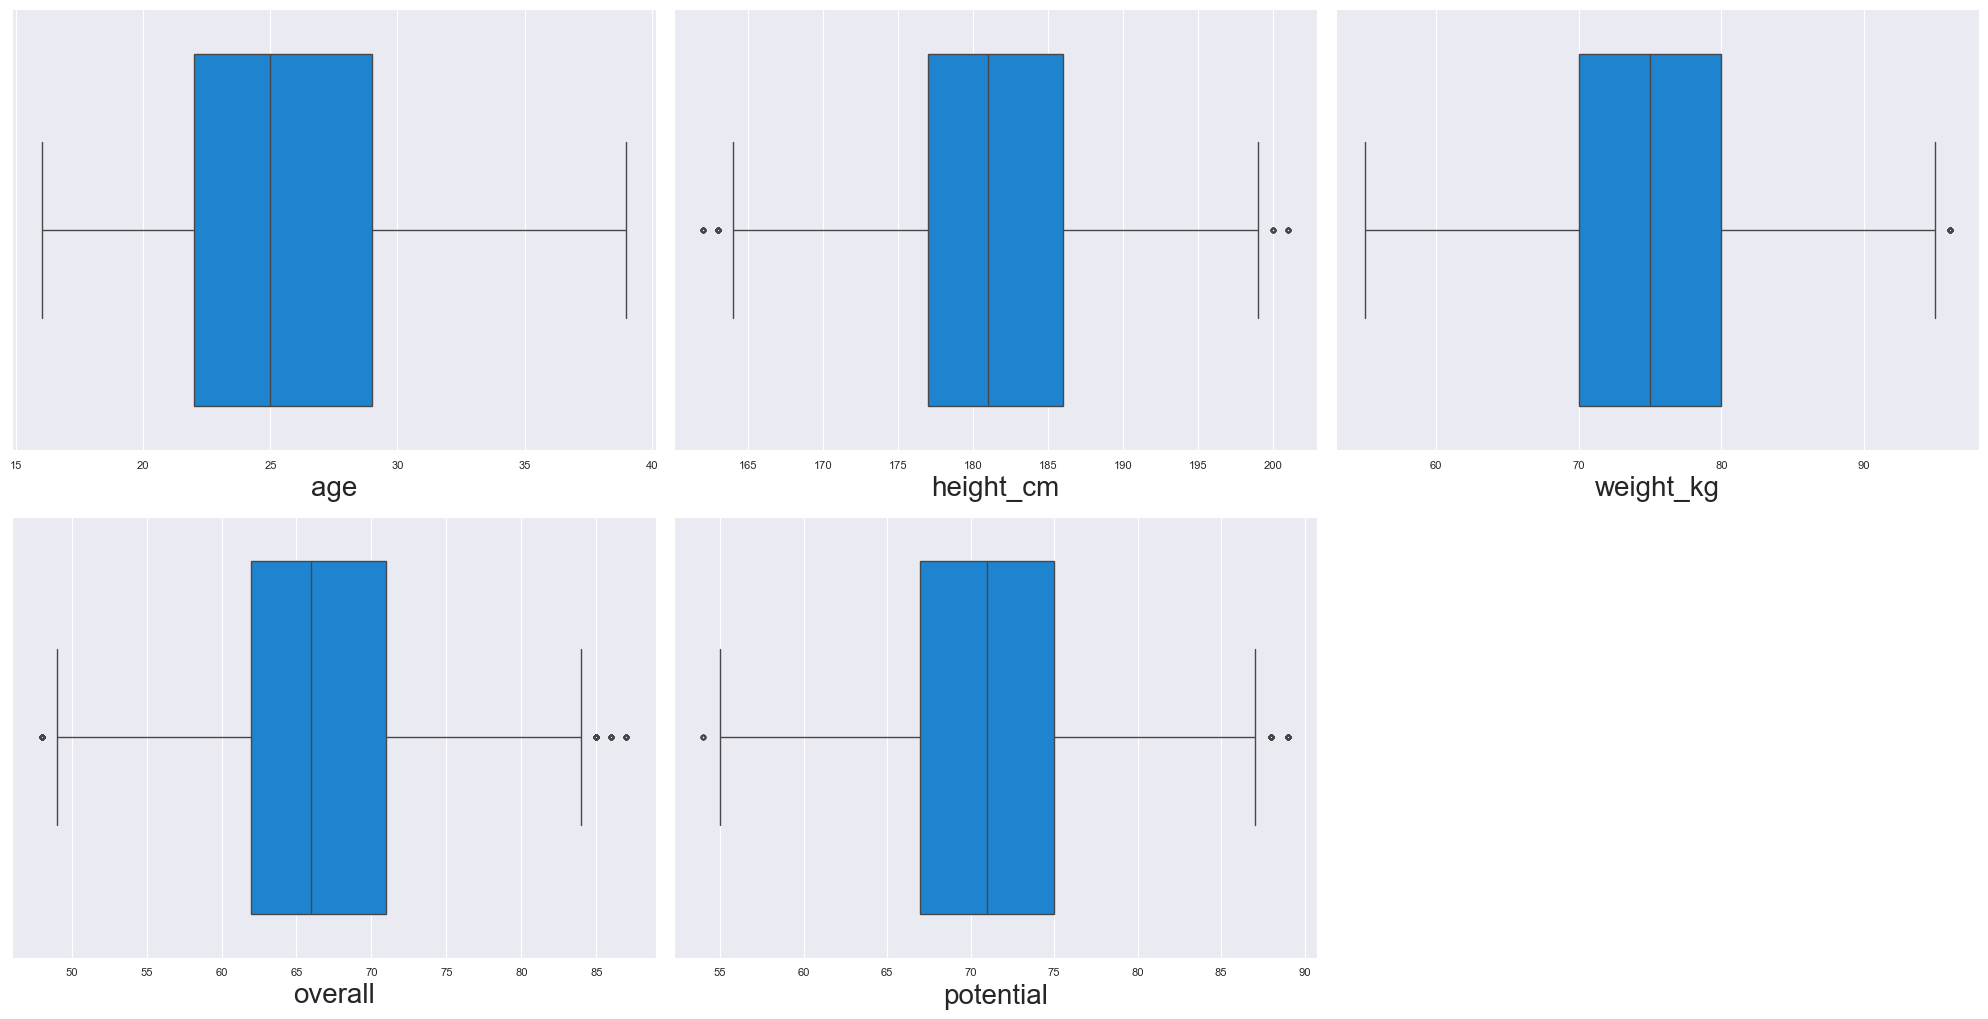

In [337]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in column_empherical: # iteration of columns / acessing the columns from  dataset 
    plt.subplot(5,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
    sns.boxplot(x=fifa_data[column]) # Plotting box plots 
    plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

##### INTER QUARTILE RANGE (IQR)

In [338]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats

columns_iqr = ['value_eur','wage_eur','release_clause_eur','pace','shooting','dribbling','defending','physic']

# step:2
def iqr(data):
    for column in columns_iqr:
        Q1 = data[column].quantile(0.25)  # first quantile
        Q3 = data[column].quantile(0.75)  #third quantile
        IQR = Q3 - Q1
        
        # define limits
        min_limit = Q1 - 1.5*IQR
        max_limit = Q3 + 1.5*IQR
        
        # Calculate percentages of outliers
        upper_percent = len(data[data[column] > max_limit])/len(data)*100
        lower_percent = (len(data[data[column] < min_limit])/len(data))*100
        
         # Print or log the details
        print(f"Column: {column}")
        print(f"  IQR: {IQR}")
        print(f"  Min limit: {min_limit}")
        print(f"  Max limit: {max_limit}")
        print(f"  Upper percentage: {upper_percent:.2f}%")
        print(f"  Lower percentage: {lower_percent:.2f}%")

        # Impute outliers if both percentages are less than 0.5%
        median_value = data[column].median()
        if upper_percent < 0.5:
            data.loc[data[column] > max_limit, column] = median_value
        elif lower_percent < 0.5:
            data.loc[data[column] < min_limit, column] = median_value
            
            print(f"  Imputation applied for column: {column}")

In [339]:
iqr(fifa_data)

Column: value_eur
  IQR: 1775000.0
  Min limit: -2337500.0
  Max limit: 4762500.0
  Upper percentage: 13.74%
  Lower percentage: 0.00%
  Imputation applied for column: value_eur
Column: wage_eur
  IQR: 7000.0
  Min limit: -9500.0
  Max limit: 18500.0
  Upper percentage: 12.91%
  Lower percentage: 0.00%
  Imputation applied for column: wage_eur
Column: release_clause_eur
  IQR: 2604000.0
  Min limit: -3310000.0
  Max limit: 7106000.0
  Upper percentage: 15.37%
  Lower percentage: 0.00%
  Imputation applied for column: release_clause_eur
Column: pace
  IQR: 11.0
  Min limit: 46.5
  Max limit: 90.5
  Upper percentage: 1.03%
  Lower percentage: 4.19%
Column: shooting
  IQR: 18.0
  Min limit: 17.0
  Max limit: 89.0
  Upper percentage: 0.02%
  Lower percentage: 0.03%
Column: dribbling
  IQR: 11.0
  Min limit: 41.5
  Max limit: 85.5
  Upper percentage: 0.40%
  Lower percentage: 4.05%
Column: defending
  IQR: 25.0
  Min limit: 1.5
  Max limit: 101.5
  Upper percentage: 0.00%
  Lower percentage

### DROP UNIQUE AND CONSTANT FEATURE

* Here we are going to drop unique column as well as lots of missing value column.
* The column ls,st,rs,lw,cf etc.. are playing position in the game and the data in this columns is basically the potential of the player if were to play in that position, so we assume the player only playes with the team position and we will drop this column

In [340]:
# Drop column
fifa_data.drop(['short_name','nationality','club','player_positions','body_type',
            'player_tags','team_jersey_number','joined','contract_valid_until','nation_position',
          'gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
          'player_traits','ls','st','rs','lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate', 'position_category'],axis=1,inplace=True)

### 5.FEATURE SCALING


#### MIN-MAX SCALING
* Scale the feature between 0 to 1
* Only scale the continous feature
* Use min max scaling because of dataset contain large amount of outlier so outlier is going to be biased.ed.

In [341]:
# preferred_foot, team_position, international_reputation, weak_foot, skill_moves

non_scaled_data = fifa_data[['preferred_foot', 'team_position', 'international_reputation', 'weak_foot', 'skill_moves']]
non_scaled_data.head(3)

preferred_foot  team_position  international_reputation  weak_foot  \
0               0             25                         5          4   
1               1             14                         5          4   
2               1              0                         5          5   

   skill_moves  
0            4  
1            5  
2            5

In [342]:
fifa_data.drop(['preferred_foot', 'team_position', 'international_reputation', 'weak_foot', 'skill_moves'], axis = 1, inplace= True)

In [343]:
columns_name = fifa_data.columns

In [344]:
fifa_data.sample(3)

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
17320  23.0      188.0       78.0     55.0       61.0      80000      1000   
2478   34.0      176.0       70.0     74.0       74.0    2200000      8000   
17600  17.0      194.0       82.0     53.0       73.0     100000      1000   

       release_clause_eur  pace  shooting  passing  dribbling  defending  \
17320            156000.0  69.0      54.0     58.0       64.0       56.0   
2478            3500000.0  44.0      46.0     63.0       62.0       74.0   
17600            250000.0  69.0      54.0     58.0       64.0       56.0   

       physic  attacking_crossing  attacking_finishing  \
17320    66.0                  14                    5   
2478     79.0                  49                   36   
17600    66.0                  10                    4   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
17320                          14                       21                  8   
2478                           61                       70                 46   
17600                          10                       16                  8   

       skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
17320                9           11                 11                  21   
2478                58           59                 50                  64   
17600               13           12                 10                  22   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
17320                  18                     33                     29   
2478                   66                     49                     39   
17600                  15                     24                     15   

       movement_agility  movement_reactions  movement_balance  \
17320                48                  50                36   
2478                 64                  75                69   
17600                22                  42                28   

       power_shot_power  power_jumping  power_stamina  power_strength  \
17320                38             44             22              56   
2478                 60             83             86              77   
17600                41             36             18              52   

       power_long_shots  mentality_aggression  mentality_interceptions  \
17320                 5                    21                        7   
2478                 51                    72                       76   
17600                 6                    20                       12   

       mentality_positioning  mentality_vision  mentality_penalties  \
17320                      5                38                   19   
2478                      54                70                   58   
17600                      6                32                   15   

       mentality_composure  defending_marking  defending_standing_tackle  \
17320                   37                 28                         14   
2478                    65                 77                         76   
17600                   28                  7                         11   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
17320                        14                  56                    53   
2478                         71                  12                    10   
17600                        10                  59                    52   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
17320                   51                       51                    59  
2478                    11                        9                    13  
17600                   55                       48                    52

In [345]:
# Scale only continous feature in nature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Object Creation
fifa_data = scaler.fit_transform(fifa_data)

In [347]:
fifa_data = pd.DataFrame(fifa_data)
fifa_data.columns = columns_name

In [348]:
fifa_data = pd.concat([fifa_data, non_scaled_data], axis = 1)

In [349]:
fifa_data.sample(4)

age  height_cm  weight_kg   overall  potential  value_eur  \
15107  0.260870   0.435897   0.463415  0.307692   0.342857   0.002464   
1550   0.521739   0.666667   0.707317  0.717949   0.628571   0.066351   
5198   0.478261   0.538462   0.829268  0.564103   0.485714   0.017062   
11131  0.173913   0.410256   0.487805  0.410256   0.657143   0.008294   

       wage_eur  release_clause_eur      pace  shooting   passing  dribbling  \
15107  0.001770            0.006063  0.527778  0.229730  0.250000   0.241935   
1550   0.044248            0.060714  0.611111  0.202703  0.397059   0.596774   
5198   0.007080            0.016278  0.666667  0.513514  0.588235   0.758065   
11131  0.003540            0.009638  0.680556  0.635135  0.235294   0.612903   

       defending    physic  attacking_crossing  attacking_finishing  \
15107   0.626667  0.566667            0.238636             0.322581   
1550    0.786667  0.966667            0.465909             0.193548   
5198    0.666667  0.916667            0.727273             0.548387   
11131   0.040000  0.400000            0.227273             0.688172   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
15107                    0.647727                 0.517647           0.252874   
1550                     0.829545                 0.717647           0.379310   
5198                     0.670455                 0.729412           0.321839   
11131                    0.625000                 0.564706           0.574713   

       skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
15107         0.204301     0.261364           0.277778            0.488095   
1550          0.580645     0.318182           0.100000            0.630952   
5198          0.698925     0.590909           0.444444            0.690476   
11131         0.591398     0.375000           0.277778            0.238095   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
15107            0.461538               0.670588               0.541176   
1550             0.637363               0.623529               0.705882   
5198             0.725275               0.729412               0.694118   
11131            0.659341               0.705882               0.741176   

       movement_agility  movement_reactions  movement_balance  \
15107          0.635294            0.306667          0.682353   
1550           0.623529            0.506667          0.564706   
5198           0.705882            0.600000          0.658824   
11131          0.529412            0.600000          0.623529   

       power_shot_power  power_jumping  power_stamina  power_strength  \
15107          0.308642       0.684211       0.482353        0.636364   
1550           0.567901       0.868421       0.764706        0.909091   
5198           0.604938       0.684211       0.882353        0.831169   
11131          0.530864       0.578947       0.505882        0.467532   

       power_long_shots  mentality_aggression  mentality_interceptions  \
15107          0.200000              0.430233                 0.640449   
1550           0.233333              0.837209                 0.786517   
5198           0.500000              0.732558                 0.651685   
11131          0.622222              0.232558                 0.134831   

       mentality_positioning  mentality_vision  mentality_penalties  \
15107               0.451613          0.341176             0.317647   
1550                0.397849          0.270588             0.070588   
5198                0.602151          0.541176             0.447059   
11131               0.698925          0.388235             0.611765   

       mentality_composure  defending_marking  defending_standing_tackle  \
15107             0.583333           0.634409                   0.678161   
1550              0.571429           0.741935                   0.816092   
5198              0.595238           0.698925                   0.724

## FEATURE SELECTION

### CHECKING CORRELATION

In [350]:
fifa_data.corr()

age  height_cm  weight_kg   overall  \
age                         1.000000   0.081826   0.235509  0.465942   
height_cm                   0.081826   1.000000   0.758770  0.040680   
weight_kg                   0.235509   0.758770   1.000000  0.152620   
overall                     0.465942   0.040680   0.152620  1.000000   
potential                  -0.263496  -0.002577  -0.015065  0.627283   
value_eur                   0.083345   0.010298   0.049439  0.568768   
wage_eur                    0.152189   0.019600   0.063460  0.496974   
release_clause_eur          0.068669   0.011371   0.045490  0.539411   
pace                       -0.178582  -0.373241  -0.333784  0.141097   
shooting                    0.223069  -0.167167  -0.074125  0.453920   
passing                     0.307117  -0.251702  -0.157101  0.627560   
dribbling                   0.152476  -0.349535  -0.251711  0.536466   
defending                   0.245411   0.226195   0.224705  0.303984   
physic                      0.404399   0.453486   0.532331  0.475297   
attacking_crossing          0.131539  -0.497227  -0.396936  0.389289   
attacking_finishing         0.081372  -0.374448  -0.288346  0.340242   
attacking_heading_accuracy  0.152823   0.011685   0.045244  0.347073   
attacking_short_passing     0.138928  -0.369698  -0.285845  0.500757   
attacking_volleys           0.145669  -0.349416  -0.257117  0.391496   
skill_dribbling             0.020140  -0.498800  -0.410891  0.370315   
skill_curve                 0.144337  -0.446247  -0.345106  0.414414   
skill_fk_accuracy           0.192761  -0.408897  -0.306785  0.387645   
skill_long_passing          0.186275  -0.333392  -0.256855  0.484578   
skill_ball_control          0.091374  -0.423452  -0.335102  0.455734   
movement_acceleration      -0.148783  -0.556171  -0.487734  0.184868   
movement_sprint_speed      -0.139705  -0.473234  -0.416656  0.197523   
movement_agility           -0.019365  -0.630699  -0.538694  0.251562   
movement_reactions          0.464196  -0.016994   0.089642  0.853851   
movement_balance           -0.087483  -0.787144  -0.662585  0.102954   
power_shot_power            0.263674  -0.172917  -0.055168  0.564511   
power_jumping               0.186651  -0.037792   0.036262  0.265549   
power_stamina               0.121348  -0.290375  -0.213385  0.370892   
power_strength              0.341898   0.532803   0.611371  0.361541   
power_long_shots            0.164369  -0.382525  -0.275918  0.424567   
mentality_aggression        0.262180  -0.044888   0.033688  0.402270   
mentality_interceptions     0.198394  -0.053658  -0.024550  0.318321   
mentality_positioning       0.089510  -0.444021  -0.351582  0.354784   
mentality_vision            0.196565  -0.369987  -0.279618  0.503976   
mentality_penalties         0.143095  -0.333835  -0.242049  0.344874   
mentality_composure         0.370790  -0.157882  -0.053070  0.713519   
defending_marking           0.159563  -0.076984  -0.045115  0.305655   
defending_standing_tackle   0.119566  -0.068868  -0.048719  0.253197   
defending_sliding_tackle    0.104168  -0.077487  -0.060498  0.223361   
goalkeeping_diving          0.107007   0.366298   0.334619 -0.017887   
goalkeeping_handling        0.109208   0.366080   0.336499 -0.018431   
goalkeeping_kicking         0.108890   0.363583   0.332997 -0.022055   
goalkeeping_positioning     0.117237   0.365898   0.337138 -0.011307   
goalkeeping_reflexes        0.108485   0.366145   0.335983 -0.017552   
preferred_foot              0.006318   0.083466   0.076585 -0.035088   
team_position              -0.164456  -0.038707  -0.058486 -0.214254   
international_reputation    0.256318   0.038448   0.089659  0.431482   
weak_foot                   0.073591  -0.173892  -0.126301  0.227064   
skill_moves                 0.048315  -0.427502  -0.347745  0.400131   

                            potential  value_eur  wage_eur  \
age                         -0.263496   0.083345  0.152189   
height_cm           

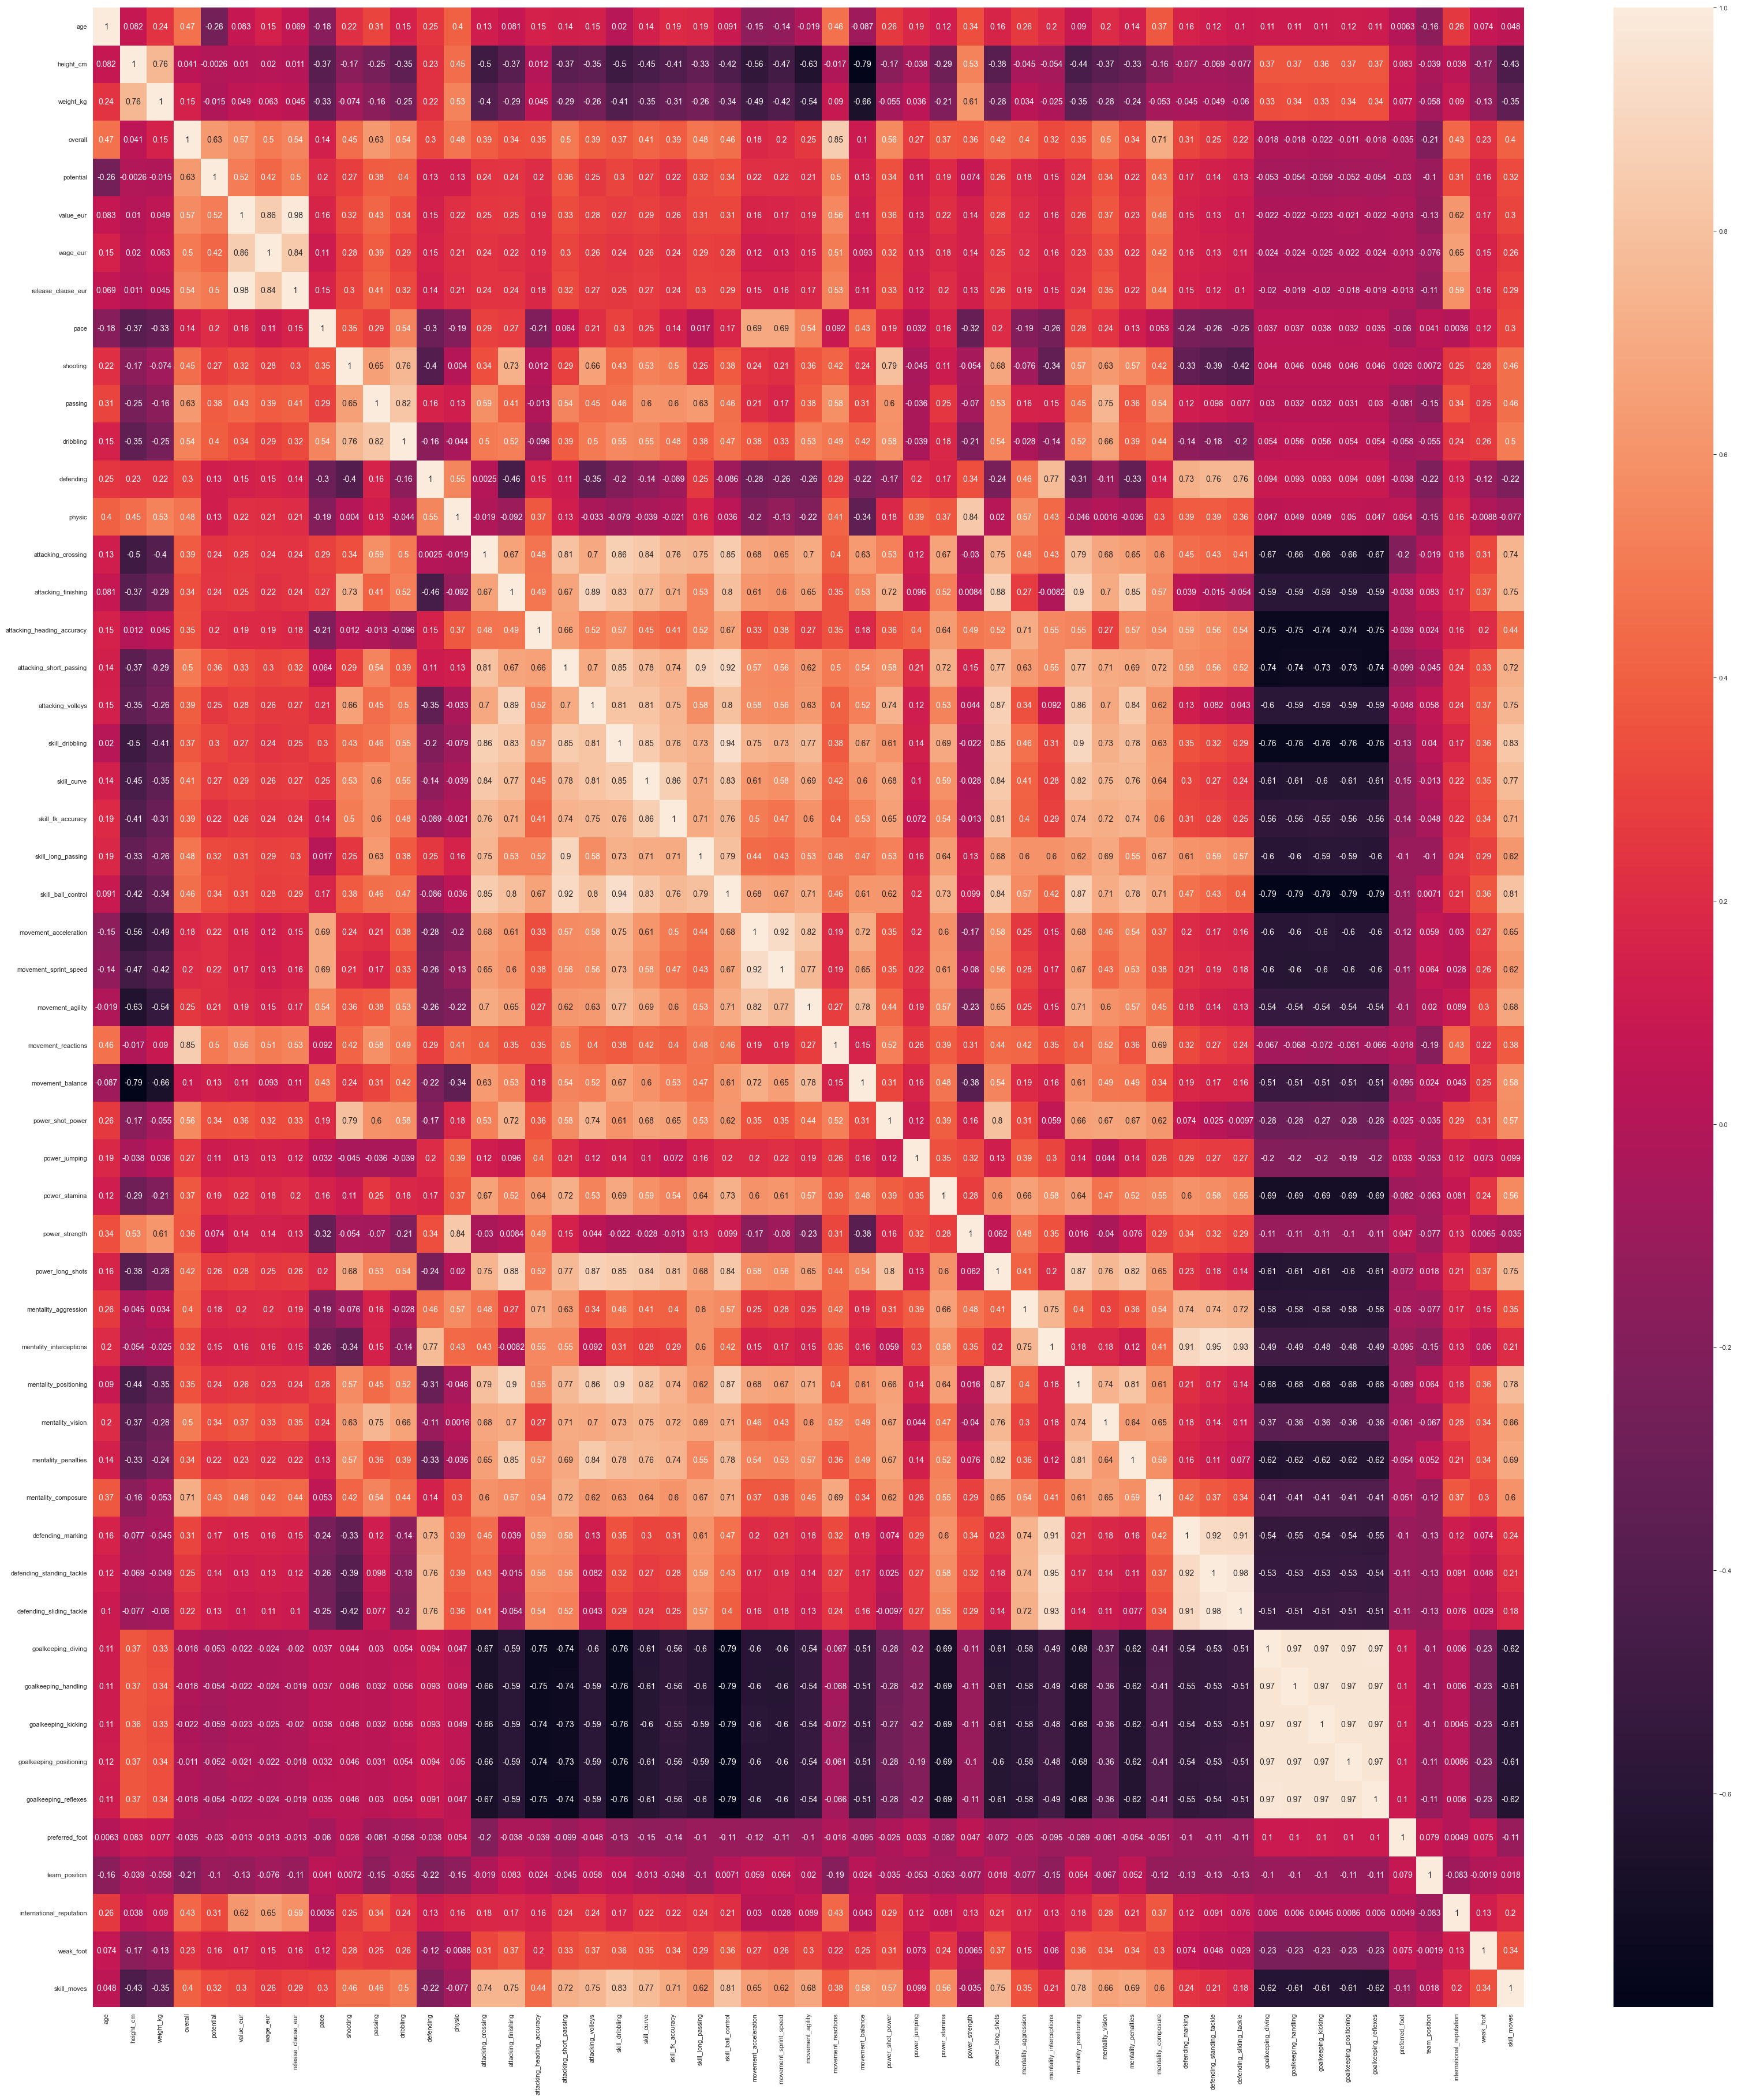

In [351]:
# # Plot hitmap for better visualisation
plt.figure(figsize=(40,45))
sns.heatmap(fifa_data.corr(),annot=True)
plt.show()

* From the above heatmap is very difficult to find highly correalted feature so we are create a python code to check the highly corelated feature

In [352]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = fifa_data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1                   feature2      corr
0                   value_eur         release_clause_eur  0.979233
1          release_clause_eur                  value_eur  0.979233
2   defending_standing_tackle   defending_sliding_tackle  0.975808
3    defending_sliding_tackle  defending_standing_tackle  0.975808
4        goalkeeping_reflexes         goalkeeping_diving  0.973922
5          goalkeeping_diving       goalkeeping_reflexes  0.973922
6          goalkeeping_diving       goalkeeping_handling  0.971330
7        goalkeeping_handling         goalkeeping_diving  0.971330
8        goalkeeping_reflexes       goalkeeping_handling  0.971244
9        goalkeeping_handling       goalkeeping_reflexes  0.971244
10    goalkeeping_positioning         goalkeeping_diving  0.971218
11         goalkeeping_diving    goalkeeping_positioning  0.971218
12    goalkeeping_positioning       goalkeeping_reflexes  0.971060
13       goalkeeping_reflexes    goalkeeping_positioning  0.971060
14       goalkeeping_handling    goalkeeping_positioning  0.970517
15    goalkeeping_positioning       goalkeeping_handling  0.970517
16        goalkeeping_kicking       goalkeeping_reflexes  0.967866
17       goalkeeping_reflexes        goalkeeping_kicking  0.967866
18        goalkeeping_kicking         goalkeeping_diving  0.967057
19         goalkeeping_diving        goalkeeping_kicking  0.967057
20       goalkeeping_handling        goalkeeping_kicking  0.966508
21        goalkeeping_kicking       goalkeeping_handling  0.966508
22        goalkeeping_kicking    goalkeeping_positioning  0.966061
23    goalkeeping_positioning        goalkeeping_kicking  0.966061
24    mentality_interceptions  defending_standing_tackle  0.945287
25  defending_standing_tackle    mentality_interceptions  0.945287
26            skill_dribbling         skill_ball_control  0.943461
27         skill_ball_control            skill_dribbling  0.943461
28   defending_sliding_tackle    mentality_interceptions  0.933894
29    mentality_interceptions   defending_sliding_tackle  0.933894
30      movement_acceleration      movement_sprint_speed  0.923721
31      movement_sprint_speed      movement_acceleration  0.923721
32          defending_marking  defending_standing_tackle  0.918593
33  defending_standing_tackle          defending_marking  0.918593
34         skill_ball_control    attacking_short_passing  0.917721
35    attacking_short_passing         skill_ball_control  0.917721
36   defending_sliding_tackle          defending_marking  0.909153
37          defending_marking   defending_sliding_tackle  0.909153
38    mentality_interceptions          defending_marking  0.907401
39          defending_marking    mentality_interceptions  0.907401
40            skill_dribbling      mentality_positioning  0.904501
41      mentality_positioning            skill_dribbling  0.904501

##### DROP HIGHLY CORRELATED FEATURE

In [353]:
fifa_data.drop(['release_clause_eur','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'],axis=1,inplace=True)

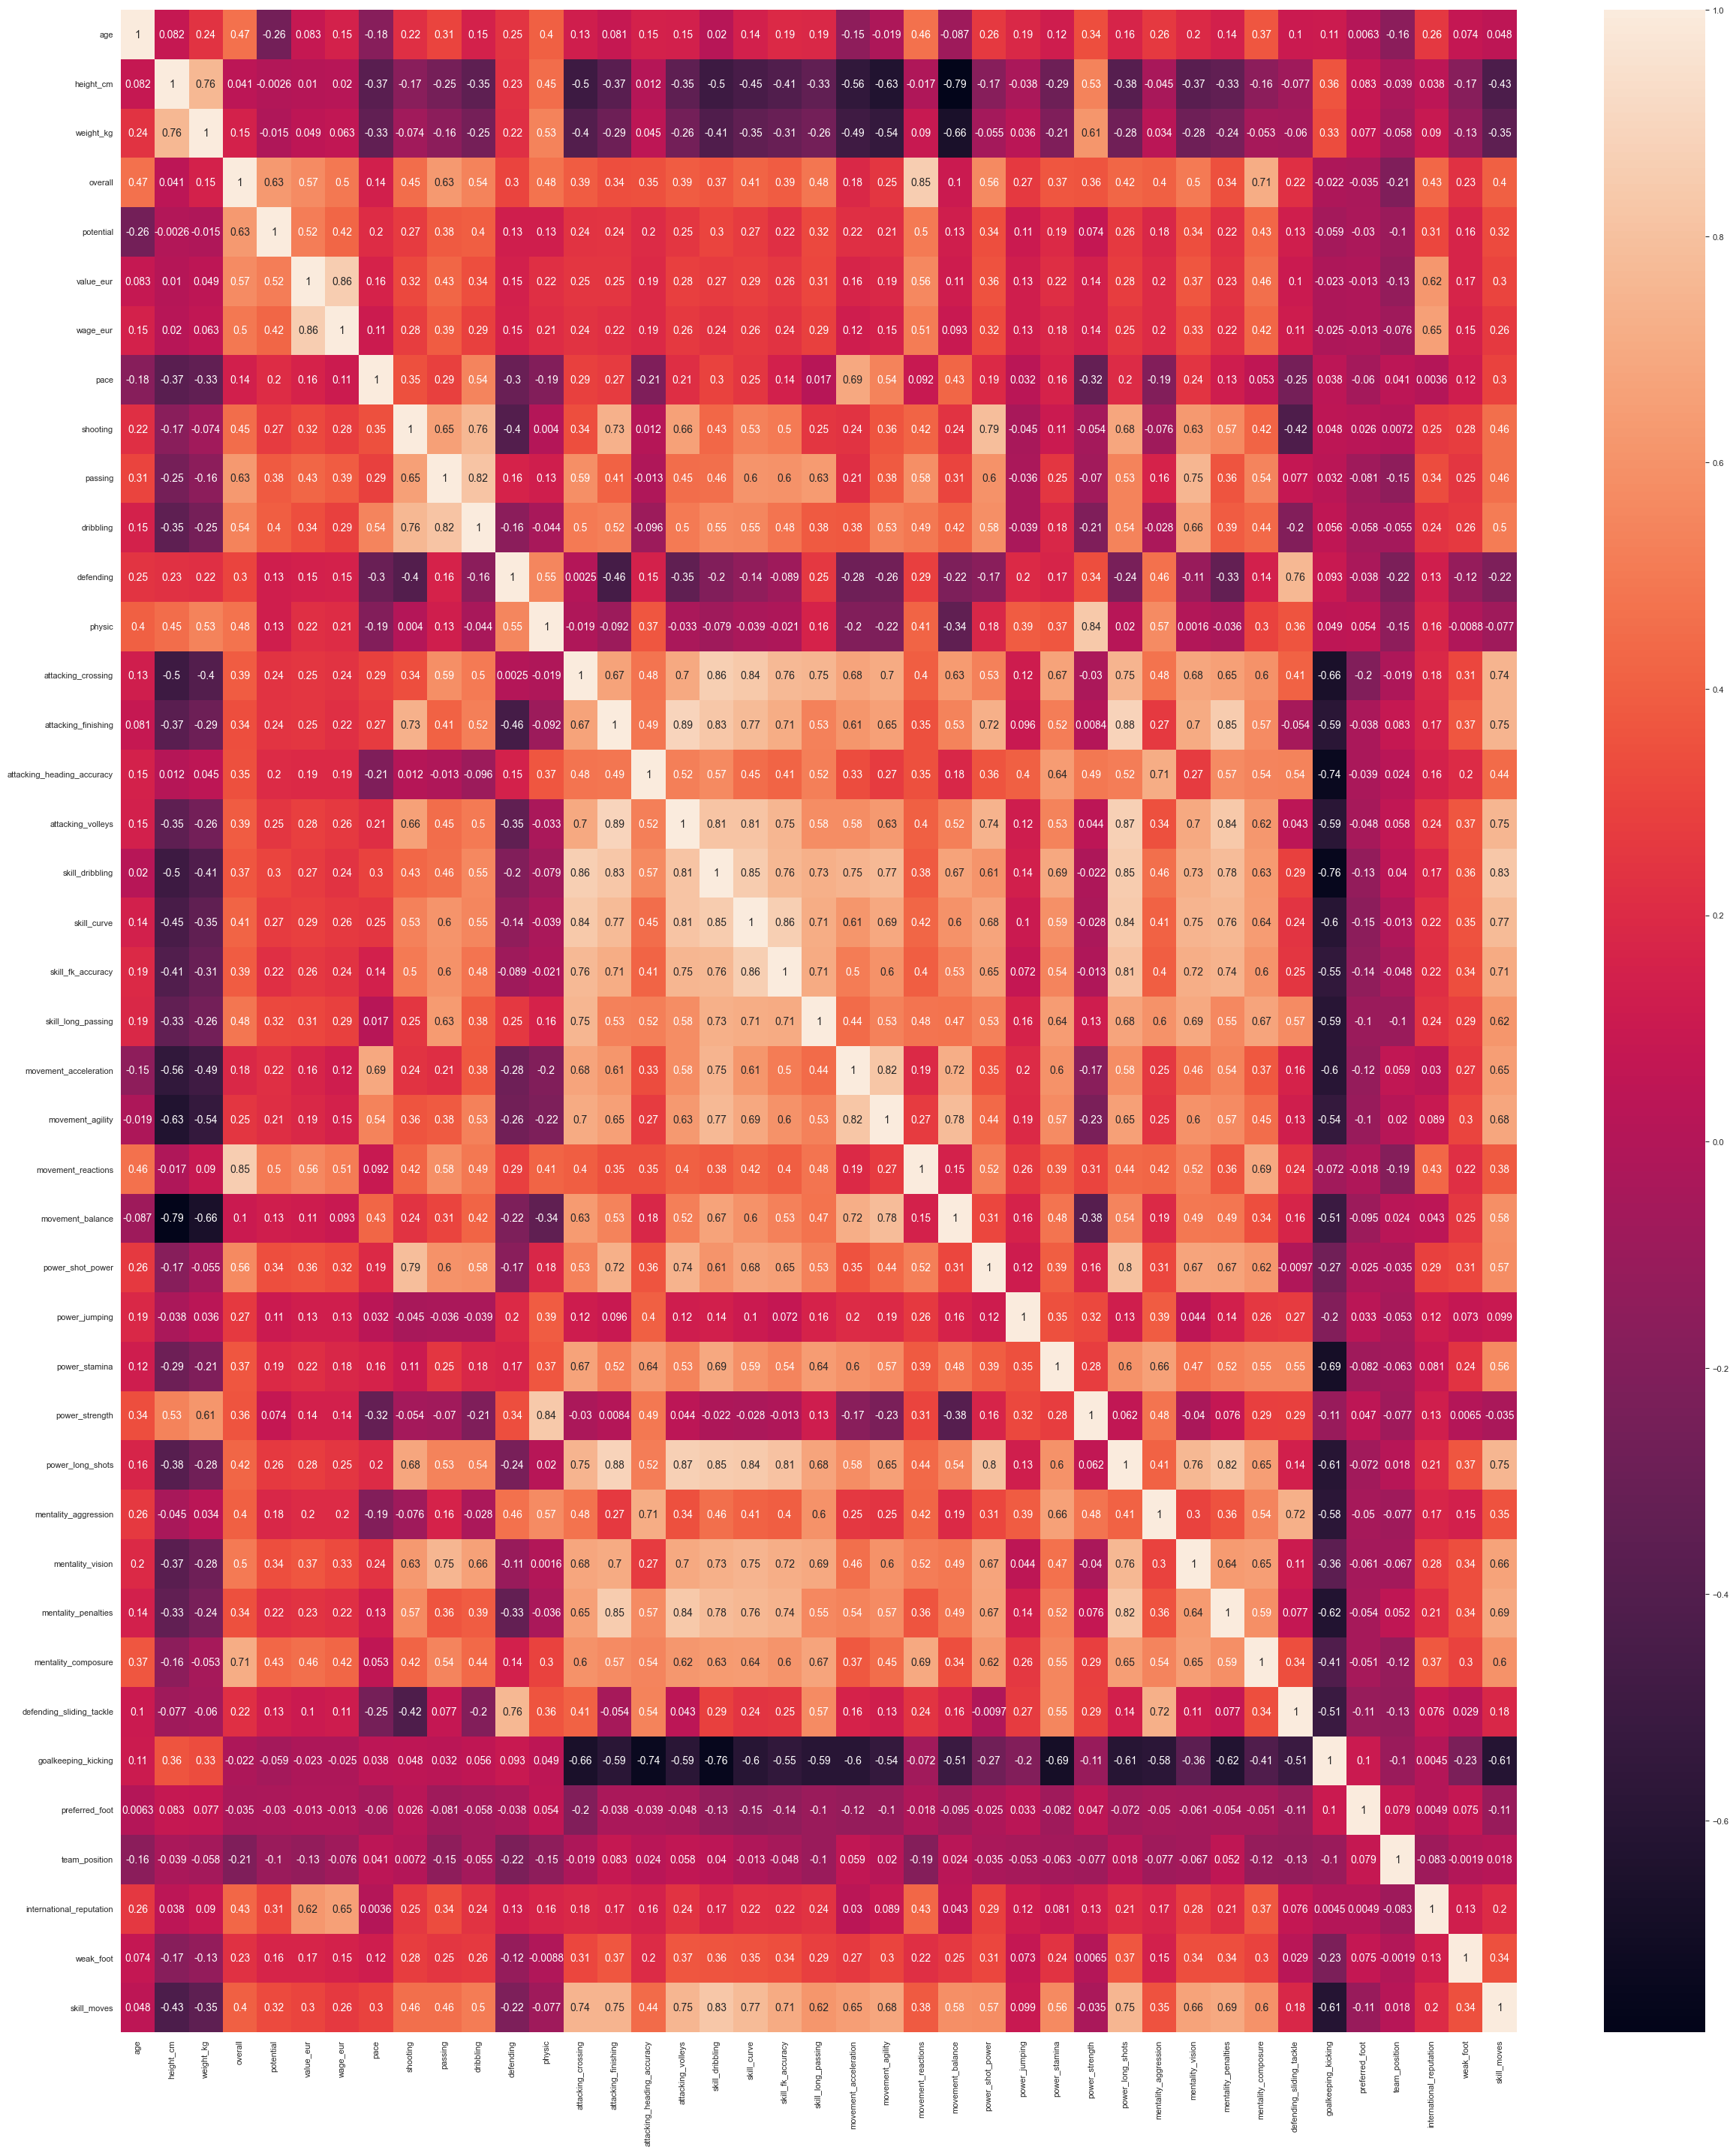

In [354]:
# Plot hitmap for after drop highly correlated feature better visualisation
plt.figure(figsize=(30,35))
sns.heatmap(fifa_data.corr(),annot=True)
plt.show()

### 3.CHECKING DUPLICATES

In [355]:
fifa_data.duplicated().sum()

0

### 4.PRINCIPLE COMPONENT ANALYSIS(PCA)

We are using PCA to choose the features.

PCA can perform feature selection by:

- Addressing the feature selection issue from a numerical analysis viewpoint 
- Selecting important individuals from all the feature components 
- Evaluating the significance of each feature component of the original samplemple

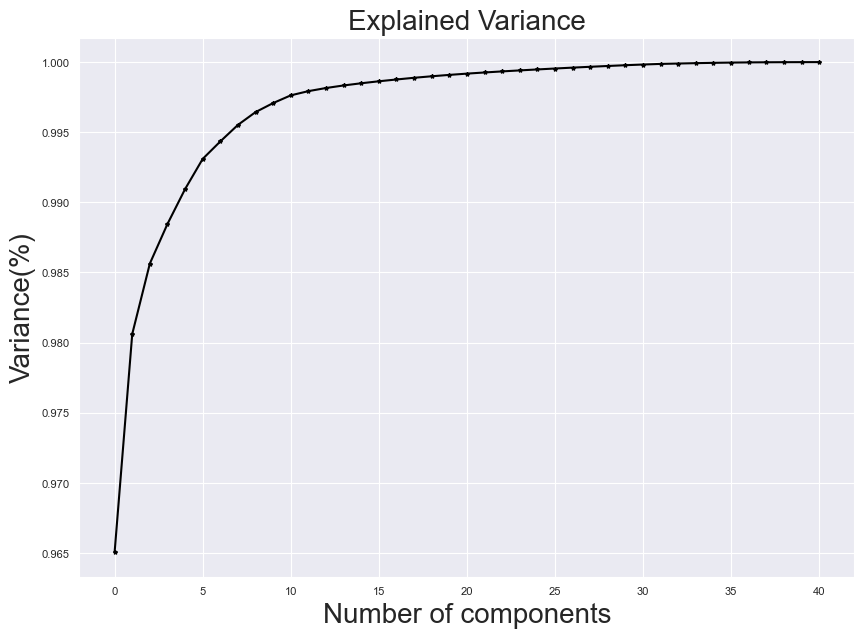

In [356]:
# Step:1 Getting optimal value of pca
from sklearn.decomposition import PCA
pca = PCA() # Object creation
principlecomponents = pca.fit_transform(fifa_data) # Fitting the data
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k') #plot the variance ratio
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

We are going to select only 10 features with high variance that mean less variance loss.

The features after 10 have similar or constant varince.

In [357]:
# Step:2 Select the components
pca = PCA(n_components=10)
fifa = pca.fit_transform(fifa_data)

# Step:3 Make new dataframe
principle_df = pd.DataFrame(data=fifa,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0   3.936439  3.005813  0.077197  1.625116  0.178454  2.785319  1.364675   
1  -7.057493  3.508113  0.054979  1.827396  1.189243  2.147112  1.613313   
2 -21.052707  3.959929  0.932141  1.096228  1.159006  2.270824  1.894227   
3 -16.057098 -1.454145  0.818615  0.960769  0.649089  1.574533  0.718323   
4  -7.052341  2.770733  0.319076  1.048423  0.972153  1.782003  1.016435   

       pca8      pca9     pca10  
0 -0.866923 -1.169760 -0.300141  
1  0.029688 -1.305366 -0.185435  
2 -0.456152 -1.213763 -0.303036  
3 -0.391897 -0.253879  0.181849  
4 -0.631959 -0.909409 -0.118065

### K-MEANS CLUSTERING

### MODEL CREATION
#### AIM 
* Create a cluster on data
* Get best sillhoutte score, range of sillhoutte score between -1 to +1

In [358]:
#Step:1 Define independant veriable
X = principle_df
X.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0   3.936439  3.005813  0.077197  1.625116  0.178454  2.785319  1.364675   
1  -7.057493  3.508113  0.054979  1.827396  1.189243  2.147112  1.613313   
2 -21.052707  3.959929  0.932141  1.096228  1.159006  2.270824  1.894227   
3 -16.057098 -1.454145  0.818615  0.960769  0.649089  1.574533  0.718323   
4  -7.052341  2.770733  0.319076  1.048423  0.972153  1.782003  1.016435   

       pca8      pca9     pca10  
0 -0.866923 -1.169760 -0.300141  
1  0.029688 -1.305366 -0.185435  
2 -0.456152 -1.213763 -0.303036  
3 -0.391897 -0.253879  0.181849  
4 -0.631959 -0.909409 -0.118065

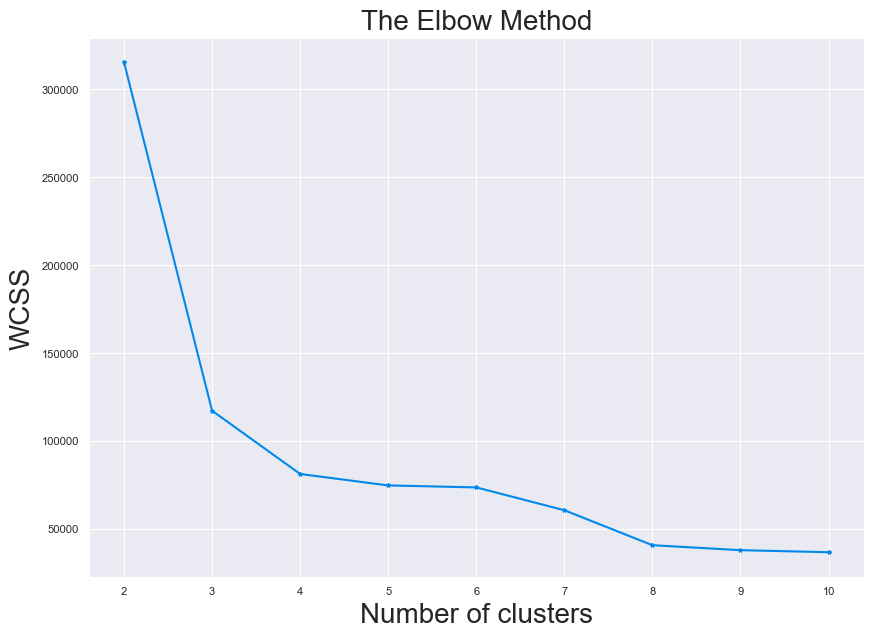

In [359]:
# Step:3 Initalize the k value
from sklearn.cluster import KMeans
kmeans = KMeans() # Object creation
wcss = [] # Create empty list

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(2,11),wcss,marker='*')
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()

* From above plot we are select 3 cluster because of odd no and more variance

In [360]:
# Step:3 initalize the cluster
kmeans = KMeans(n_clusters=3,random_state=45)

# Step:4 Fitting the data
kmeans.fit(X)

# Step:5  Get labels
kmeans.labels_

# Step:6 Print dataset with labels
principle_df['cluster'] = pd.DataFrame(kmeans.labels_)
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0   3.936439  3.005813  0.077197  1.625116  0.178454  2.785319  1.364675   
1  -7.057493  3.508113  0.054979  1.827396  1.189243  2.147112  1.613313   
2 -21.052707  3.959929  0.932141  1.096228  1.159006  2.270824  1.894227   
3 -16.057098 -1.454145  0.818615  0.960769  0.649089  1.574533  0.718323   
4  -7.052341  2.770733  0.319076  1.048423  0.972153  1.782003  1.016435   

       pca8      pca9     pca10  cluster  
0 -0.866923 -1.169760 -0.300141        0  
1  0.029688 -1.305366 -0.185435        1  
2 -0.456152 -1.213763 -0.303036        2  
3 -0.391897 -0.253879  0.181849        1  
4 -0.631959 -0.909409 -0.118065        1

In [361]:
kmeans.labels_

array([0, 1, 2, ..., 0, 0, 0])

In [362]:
# Step:7 initalize the centroids
kmeans.cluster_centers_

array([[ 3.91907806e+00, -2.27964109e-02,  3.75572422e-03,
         6.10420310e-03,  4.58575718e-03, -1.55452204e-02,
         8.35316621e-03, -4.83634229e-03, -1.29455878e-03,
        -1.33128479e-04],
       [-1.23173861e+01, -4.01754360e-02, -1.67396354e-02,
        -2.35057588e-02, -4.63361718e-02,  7.72771258e-02,
        -2.82181034e-02,  2.03238091e-02,  1.95923376e-02,
         1.33358424e-02],
       [-1.98607705e+01,  6.75132344e-01,  5.66706593e-03,
        -9.31196158e-03,  1.36518417e-01, -6.34442363e-02,
        -3.24993686e-02, -1.13096458e-03, -7.11259839e-02,
        -6.39693090e-02]])

### MODEL EVALUATION

##### SILHOUETTE SCORE
* silhouette score range(-1 to +1)
* +1 ---> Spamles are very far from cluster
*  0 ---> Samples close to dicision boundry
* -1 ---> Samples are assign to wrong cluster

In [363]:
# Step:8 Create a new veriable assign to labels
labels = kmeans.labels_
labels

# Step:9 import library to evaluate the model
from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(X,labels)
print("Silhouette Score:",silhou_score)

Silhouette Score: 0.6187198211010579


### CONCLUSION:
* 3 Cluster silhouette score is 0.6162
* 5 cluster Silhouette Score is 0.5011
* From the above score of we are select the 3 cluster

##### CLUSTER

Plotting the clusters

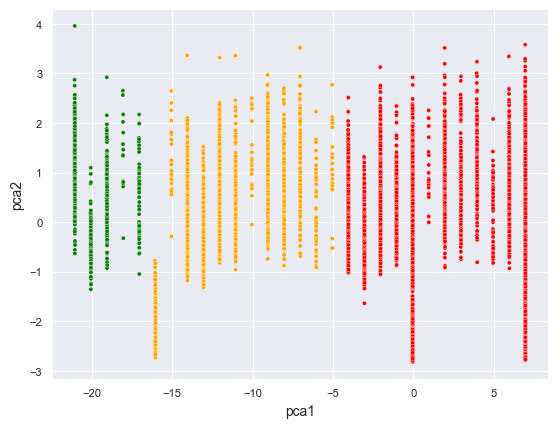

In [364]:
color = np.array(['red','orange','green'])
sns.scatterplot(x= principle_df.pca1,y=principle_df.pca2,c=color[kmeans.labels_])
plt.show()

### MODEL SAVING

In [365]:
# Model saving using pickle
import pickle
file = open("kmeans_clustering_model.pkl","wb")
pickle.dump(kmeans,file)

#### Resetting the display of max columns and rows

In [366]:
pd.reset_option('display.max_column', None)
pd.reset_option('display.max_rows', None)

### Report on Challenges faced

- Had difficulty proccessing huge dataset with 104 features.
- Exploratory ananlysis was bit difficult without domain knowledge.
- Had to apply PCA to choose best features without loosing variance.
- Identifying and selecting the most relevant features for analysis can be complex.